In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
df = pd.read_csv('./train.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

<AxesSubplot:xlabel='date'>

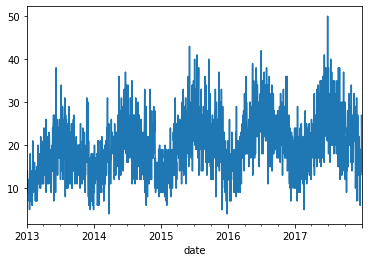

In [4]:
lim_df = df[0:1826]['sales']
lim_df.plot()

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

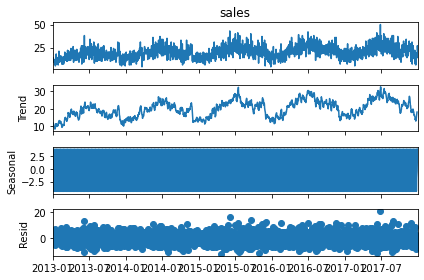

In [6]:
results = seasonal_decompose(lim_df)
results.plot();

In [78]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [79]:
WINDOW_SIZE = 10
X1, y1 = df_to_X_y(lim_df, WINDOW_SIZE)
X1.shape, y1.shape

((1816, 10, 1), (1816,))

In [80]:
X_train1, y_train1 = X1[:1461], y1[:1461]
X_test1, y_test1 = X1[1461:], y1[1461:]
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((1461, 10, 1), (1461,), (355, 10, 1), (355,))

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(10, 1)))
model1.add(LSTM(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_21 (LSTM)              (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [82]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [83]:
model1.fit(X_train1, y_train1, epochs=1000, callbacks=[cp1])

Epoch 1/1000
39/46 [========================>.....] - ETA: 0s - loss: 482.0623 - root_mean_squared_error: 21.9559WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 2s 4ms/step - loss: 475.3708 - root_mean_squared_error: 21.8030
Epoch 2/1000
39/46 [========================>.....] - ETA: 0s - loss: 405.1652 - root_mean_squared_error: 20.1287WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 390.5583 - root_mean_squared_error: 19.7625
Epoch 3/1000
37/46 [=======================>......] - ETA: 0s - loss: 174.9976 - root_mean_squared_error: 13.2287WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 149.1911 - root_mean_squared_error: 12.2144
Epoch 4/1000
38/46 [=======================>......] - ETA: 0s - loss: 32.5217 - root_mean_squared_error: 5.7028WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 31.1753 - root_mean_squared_error: 5.5835
Epoch 5/1000
39/46 [========================>.....] - ETA: 0s - loss: 28.9885 - root_mean_squared_error: 5.3841WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 29.4970 - root_mean_squared_error: 5.4311
Epoch 6/1000
39/46 [========================>.....] - ETA: 0s - loss: 29.1383 - root_mean_squared_error: 5.3980WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 29.1505 - root_mean_squared_error: 5.3991
Epoch 7/1000
40/46 [=========================>....] - ETA: 0s - loss: 28.8070 - root_mean_squared_error: 5.3672WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 28.9379 - root_mean_squared_error: 5.3794
Epoch 8/1000
38/46 [=======================>......] - ETA: 0s - loss: 29.0122 - root_mean_squared_error: 5.3863WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 28.8716 - root_mean_squared_error: 5.3732
Epoch 9/1000
40/46 [=========================>....] - ETA: 0s - loss: 29.7226 - root_mean_squared_error: 5.4518WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 28.6722 - root_mean_squared_error: 5.3546
Epoch 10/1000
40/46 [=========================>....] - ETA: 0s - loss: 28.5323 - root_mean_squared_error: 5.3416WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 28.4730 - root_mean_squared_error: 5.3360
Epoch 11/1000
39/46 [========================>.....] - ETA: 0s - loss: 28.2287 - root_mean_squared_error: 5.3131WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 28.5756 - root_mean_squared_error: 5.3456
Epoch 12/1000
36/46 [======================>.......] - ETA: 0s - loss: 28.0664 - root_mean_squared_error: 5.2978WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 28.3375 - root_mean_squared_error: 5.3233
Epoch 13/1000
36/46 [======================>.......] - ETA: 0s - loss: 27.9233 - root_mean_squared_error: 5.2843WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 28.1757 - root_mean_squared_error: 5.3081
Epoch 14/1000
37/46 [=======================>......] - ETA: 0s - loss: 27.3747 - root_mean_squared_error: 5.2321WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 28.0277 - root_mean_squared_error: 5.2941
Epoch 15/1000
36/46 [======================>.......] - ETA: 0s - loss: 27.4190 - root_mean_squared_error: 5.2363WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 27.9475 - root_mean_squared_error: 5.2865
Epoch 16/1000
39/46 [========================>.....] - ETA: 0s - loss: 28.7713 - root_mean_squared_error: 5.3639WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 28.0156 - root_mean_squared_error: 5.2930
Epoch 17/1000
39/46 [========================>.....] - ETA: 0s - loss: 28.0261 - root_mean_squared_error: 5.2940WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 27.7975 - root_mean_squared_error: 5.2723
Epoch 18/1000
37/46 [=======================>......] - ETA: 0s - loss: 27.6624 - root_mean_squared_error: 5.2595WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 27.7714 - root_mean_squared_error: 5.2699
Epoch 19/1000
39/46 [========================>.....] - ETA: 0s - loss: 27.5868 - root_mean_squared_error: 5.2523WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 27.6260 - root_mean_squared_error: 5.2560
Epoch 20/1000
45/46 [============================>.] - ETA: 0s - loss: 27.2188 - root_mean_squared_error: 5.2172WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 27.1591 - root_mean_squared_error: 5.2114
Epoch 21/1000
35/46 [=====================>........] - ETA: 0s - loss: 27.6190 - root_mean_squared_error: 5.2554WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 27.3065 - root_mean_squared_error: 5.2256
Epoch 22/1000
40/46 [=========================>....] - ETA: 0s - loss: 27.0953 - root_mean_squared_error: 5.2053WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 27.4624 - root_mean_squared_error: 5.2405
Epoch 23/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.8591 - root_mean_squared_error: 5.1826WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 27.0570 - root_mean_squared_error: 5.2016
Epoch 24/1000
36/46 [======================>.......] - ETA: 0s - loss: 27.7911 - root_mean_squared_error: 5.2717WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 26.9326 - root_mean_squared_error: 5.1897
Epoch 25/1000
36/46 [======================>.......] - ETA: 0s - loss: 27.0052 - root_mean_squared_error: 5.1966WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 27.0931 - root_mean_squared_error: 5.2051
Epoch 26/1000
36/46 [======================>.......] - ETA: 0s - loss: 26.1425 - root_mean_squared_error: 5.1130WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.9577 - root_mean_squared_error: 5.1921
Epoch 27/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.6135 - root_mean_squared_error: 5.1588WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.9414 - root_mean_squared_error: 5.1905
Epoch 28/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.5825 - root_mean_squared_error: 5.1558WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 27.0881 - root_mean_squared_error: 5.2046
Epoch 29/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.2237 - root_mean_squared_error: 5.1209WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.5715 - root_mean_squared_error: 5.1548
Epoch 30/1000
37/46 [=======================>......] - ETA: 0s - loss: 26.0653 - root_mean_squared_error: 5.1054WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.7083 - root_mean_squared_error: 5.1680
Epoch 31/1000
36/46 [======================>.......] - ETA: 0s - loss: 27.9869 - root_mean_squared_error: 5.2903WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 26.9637 - root_mean_squared_error: 5.1927
Epoch 32/1000
39/46 [========================>.....] - ETA: 0s - loss: 27.1696 - root_mean_squared_error: 5.2124WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.7673 - root_mean_squared_error: 5.1737
Epoch 33/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.3959 - root_mean_squared_error: 5.1377WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.3559 - root_mean_squared_error: 5.1338
Epoch 34/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.7435 - root_mean_squared_error: 5.1714WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.4439 - root_mean_squared_error: 5.1424
Epoch 35/1000
40/46 [=========================>....] - ETA: 0s - loss: 26.3933 - root_mean_squared_error: 5.1374WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.5880 - root_mean_squared_error: 5.1564
Epoch 36/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.3587 - root_mean_squared_error: 5.1341WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.5114 - root_mean_squared_error: 5.1489
Epoch 37/1000
40/46 [=========================>....] - ETA: 0s - loss: 26.5902 - root_mean_squared_error: 5.1566WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.3502 - root_mean_squared_error: 5.1332
Epoch 38/1000
38/46 [=======================>......] - ETA: 0s - loss: 26.4027 - root_mean_squared_error: 5.1384WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.4299 - root_mean_squared_error: 5.1410
Epoch 39/1000
35/46 [=====================>........] - ETA: 0s - loss: 27.1185 - root_mean_squared_error: 5.2075WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 26.4603 - root_mean_squared_error: 5.1440
Epoch 40/1000
37/46 [=======================>......] - ETA: 0s - loss: 25.5012 - root_mean_squared_error: 5.0499WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 26.4047 - root_mean_squared_error: 5.1385
Epoch 41/1000
37/46 [=======================>......] - ETA: 0s - loss: 26.3406 - root_mean_squared_error: 5.1323WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 26.1030 - root_mean_squared_error: 5.1091
Epoch 42/1000
37/46 [=======================>......] - ETA: 0s - loss: 27.5580 - root_mean_squared_error: 5.2496WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.6272 - root_mean_squared_error: 5.1602
Epoch 43/1000
37/46 [=======================>......] - ETA: 0s - loss: 25.6907 - root_mean_squared_error: 5.0686WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.0421 - root_mean_squared_error: 5.1031
Epoch 44/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.2086 - root_mean_squared_error: 5.1194WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.1095 - root_mean_squared_error: 5.1097
Epoch 45/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.6847 - root_mean_squared_error: 5.1657WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.9931 - root_mean_squared_error: 5.0983
Epoch 46/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.0075 - root_mean_squared_error: 5.0998WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.1653 - root_mean_squared_error: 5.1152
Epoch 47/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.8373 - root_mean_squared_error: 5.0830WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.1255 - root_mean_squared_error: 5.1113
Epoch 48/1000
37/46 [=======================>......] - ETA: 0s - loss: 26.0392 - root_mean_squared_error: 5.1029WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.9758 - root_mean_squared_error: 5.0966
Epoch 49/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.4386 - root_mean_squared_error: 5.0437WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.9214 - root_mean_squared_error: 5.0913
Epoch 50/1000
40/46 [=========================>....] - ETA: 0s - loss: 26.3048 - root_mean_squared_error: 5.1288WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.9445 - root_mean_squared_error: 5.0936
Epoch 51/1000
38/46 [=======================>......] - ETA: 0s - loss: 26.1505 - root_mean_squared_error: 5.1138WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.7567 - root_mean_squared_error: 5.0751
Epoch 52/1000
37/46 [=======================>......] - ETA: 0s - loss: 27.2187 - root_mean_squared_error: 5.2172WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 26.1769 - root_mean_squared_error: 5.1163
Epoch 53/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.7682 - root_mean_squared_error: 5.0762WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.8087 - root_mean_squared_error: 5.0802
Epoch 54/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.7497 - root_mean_squared_error: 5.0744WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.6874 - root_mean_squared_error: 5.0683
Epoch 55/1000
40/46 [=========================>....] - ETA: 0s - loss: 25.4581 - root_mean_squared_error: 5.0456WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.6843 - root_mean_squared_error: 5.0680
Epoch 56/1000
36/46 [======================>.......] - ETA: 0s - loss: 24.8335 - root_mean_squared_error: 4.9833WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.8299 - root_mean_squared_error: 5.0823
Epoch 57/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.3285 - root_mean_squared_error: 5.1311WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.9460 - root_mean_squared_error: 5.0937
Epoch 58/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.6455 - root_mean_squared_error: 5.0641WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.8147 - root_mean_squared_error: 5.0808
Epoch 59/1000
36/46 [======================>.......] - ETA: 0s - loss: 25.2963 - root_mean_squared_error: 5.0295WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.9230 - root_mean_squared_error: 5.0915
Epoch 60/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.4462 - root_mean_squared_error: 5.0444WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.7642 - root_mean_squared_error: 5.0758
Epoch 61/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.1026 - root_mean_squared_error: 5.0102WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.7623 - root_mean_squared_error: 5.0757
Epoch 62/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.9272 - root_mean_squared_error: 5.0919WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.7671 - root_mean_squared_error: 5.0761
Epoch 63/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.5762 - root_mean_squared_error: 5.1552WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.8339 - root_mean_squared_error: 5.0827
Epoch 64/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.8179 - root_mean_squared_error: 5.0811WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.6907 - root_mean_squared_error: 5.0686
Epoch 65/1000
46/46 [==============================] - ETA: 0s - loss: 25.5452 - root_mean_squared_error: 5.0542WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 25.5452 - root_mean_squared_error: 5.0542
Epoch 66/1000
45/46 [============================>.] - ETA: 0s - loss: 25.5941 - root_mean_squared_error: 5.0591WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 25.6790 - root_mean_squared_error: 5.0674
Epoch 67/1000
38/46 [=======================>......] - ETA: 0s - loss: 25.5111 - root_mean_squared_error: 5.0509WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.3413 - root_mean_squared_error: 5.0340
Epoch 68/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.8861 - root_mean_squared_error: 4.9886WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.3952 - root_mean_squared_error: 5.0394
Epoch 69/1000
46/46 [==============================] - ETA: 0s - loss: 25.5789 - root_mean_squared_error: 5.0576WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 25.5789 - root_mean_squared_error: 5.0576
Epoch 70/1000
45/46 [============================>.] - ETA: 0s - loss: 25.7253 - root_mean_squared_error: 5.0720WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 25.6696 - root_mean_squared_error: 5.0665
Epoch 71/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.9356 - root_mean_squared_error: 5.0927WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.3344 - root_mean_squared_error: 5.0333
Epoch 72/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.5056 - root_mean_squared_error: 5.0503WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.6208 - root_mean_squared_error: 5.0617
Epoch 73/1000
36/46 [======================>.......] - ETA: 0s - loss: 25.0924 - root_mean_squared_error: 5.0092WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.3245 - root_mean_squared_error: 5.0323
Epoch 74/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.4793 - root_mean_squared_error: 4.9477WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.2794 - root_mean_squared_error: 5.0279
Epoch 75/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.6673 - root_mean_squared_error: 5.0663WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.4425 - root_mean_squared_error: 5.0441
Epoch 76/1000
38/46 [=======================>......] - ETA: 0s - loss: 25.2788 - root_mean_squared_error: 5.0278WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.1596 - root_mean_squared_error: 5.0159
Epoch 77/1000
38/46 [=======================>......] - ETA: 0s - loss: 25.2881 - root_mean_squared_error: 5.0287WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.3599 - root_mean_squared_error: 5.0359
Epoch 78/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.0804 - root_mean_squared_error: 5.0080WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.1725 - root_mean_squared_error: 5.0172
Epoch 79/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.9407 - root_mean_squared_error: 5.0932WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.3934 - root_mean_squared_error: 5.0392
Epoch 80/1000
36/46 [======================>.......] - ETA: 0s - loss: 25.6720 - root_mean_squared_error: 5.0668WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.3312 - root_mean_squared_error: 5.0330
Epoch 81/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.0462 - root_mean_squared_error: 5.0046WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.1027 - root_mean_squared_error: 5.0103
Epoch 82/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.9792 - root_mean_squared_error: 5.0970WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.4956 - root_mean_squared_error: 5.0493
Epoch 83/1000
40/46 [=========================>....] - ETA: 0s - loss: 25.0823 - root_mean_squared_error: 5.0082WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.2394 - root_mean_squared_error: 5.0239
Epoch 84/1000
38/46 [=======================>......] - ETA: 0s - loss: 24.9910 - root_mean_squared_error: 4.9991WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.0019 - root_mean_squared_error: 5.0002
Epoch 85/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.5378 - root_mean_squared_error: 4.9536WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.9730 - root_mean_squared_error: 4.9973
Epoch 86/1000
38/46 [=======================>......] - ETA: 0s - loss: 24.9788 - root_mean_squared_error: 4.9979WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.1529 - root_mean_squared_error: 5.0153
Epoch 87/1000
36/46 [======================>.......] - ETA: 0s - loss: 25.6000 - root_mean_squared_error: 5.0596WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.4885 - root_mean_squared_error: 5.0486
Epoch 88/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.4076 - root_mean_squared_error: 4.9404WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.0550 - root_mean_squared_error: 5.0055
Epoch 89/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.6858 - root_mean_squared_error: 5.0681WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.9251 - root_mean_squared_error: 4.9925
Epoch 90/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.7723 - root_mean_squared_error: 4.9772WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.9612 - root_mean_squared_error: 4.9961
Epoch 91/1000
38/46 [=======================>......] - ETA: 0s - loss: 24.3549 - root_mean_squared_error: 4.9351WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.8096 - root_mean_squared_error: 4.9809
Epoch 92/1000
38/46 [=======================>......] - ETA: 0s - loss: 25.4748 - root_mean_squared_error: 5.0473WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.5181 - root_mean_squared_error: 5.0515
Epoch 93/1000
38/46 [=======================>......] - ETA: 0s - loss: 24.6583 - root_mean_squared_error: 4.9657WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.3153 - root_mean_squared_error: 5.0314
Epoch 94/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.8442 - root_mean_squared_error: 4.9844WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.2839 - root_mean_squared_error: 5.0283
Epoch 95/1000
38/46 [=======================>......] - ETA: 0s - loss: 24.7692 - root_mean_squared_error: 4.9769WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.7747 - root_mean_squared_error: 4.9774
Epoch 96/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.7768 - root_mean_squared_error: 4.9776WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.9986 - root_mean_squared_error: 4.9999
Epoch 97/1000
38/46 [=======================>......] - ETA: 0s - loss: 24.1212 - root_mean_squared_error: 4.9113WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.6620 - root_mean_squared_error: 4.9661
Epoch 98/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.6484 - root_mean_squared_error: 5.0644WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.7867 - root_mean_squared_error: 4.9786
Epoch 99/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.2645 - root_mean_squared_error: 4.9259WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.8031 - root_mean_squared_error: 4.9803
Epoch 100/1000
40/46 [=========================>....] - ETA: 0s - loss: 24.5191 - root_mean_squared_error: 4.9517WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.9622 - root_mean_squared_error: 4.9962
Epoch 101/1000
36/46 [======================>.......] - ETA: 0s - loss: 24.6609 - root_mean_squared_error: 4.9660WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.8027 - root_mean_squared_error: 4.9802
Epoch 102/1000
39/46 [========================>.....] - ETA: 0s - loss: 26.0141 - root_mean_squared_error: 5.1004WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.2457 - root_mean_squared_error: 5.0245
Epoch 103/1000
40/46 [=========================>....] - ETA: 0s - loss: 24.9473 - root_mean_squared_error: 4.9947WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.6751 - root_mean_squared_error: 4.9674
Epoch 104/1000
40/46 [=========================>....] - ETA: 0s - loss: 24.6607 - root_mean_squared_error: 4.9660WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.8765 - root_mean_squared_error: 4.9876
Epoch 105/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.3291 - root_mean_squared_error: 5.0328WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.0048 - root_mean_squared_error: 5.0005
Epoch 106/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.6253 - root_mean_squared_error: 4.9624WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.9359 - root_mean_squared_error: 4.9936
Epoch 107/1000
38/46 [=======================>......] - ETA: 0s - loss: 24.2997 - root_mean_squared_error: 4.9295WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.7341 - root_mean_squared_error: 4.9733
Epoch 108/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.1640 - root_mean_squared_error: 5.0164WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.9667 - root_mean_squared_error: 4.9967
Epoch 109/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.4002 - root_mean_squared_error: 4.9397WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 25.0583 - root_mean_squared_error: 5.0058
Epoch 110/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.3670 - root_mean_squared_error: 4.9363WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.5829 - root_mean_squared_error: 4.9581
Epoch 111/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.3097 - root_mean_squared_error: 4.9305WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.7186 - root_mean_squared_error: 4.9718
Epoch 112/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.2334 - root_mean_squared_error: 5.0233WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.8144 - root_mean_squared_error: 4.9814
Epoch 113/1000
35/46 [=====================>........] - ETA: 0s - loss: 25.8023 - root_mean_squared_error: 5.0796WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 24.6853 - root_mean_squared_error: 4.9684
Epoch 114/1000
37/46 [=======================>......] - ETA: 0s - loss: 23.7876 - root_mean_squared_error: 4.8773WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.5657 - root_mean_squared_error: 4.9564
Epoch 115/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.2332 - root_mean_squared_error: 4.9227WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.4536 - root_mean_squared_error: 4.9451
Epoch 116/1000
46/46 [==============================] - ETA: 0s - loss: 24.5891 - root_mean_squared_error: 4.9587WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 24.5891 - root_mean_squared_error: 4.9587
Epoch 117/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.7645 - root_mean_squared_error: 4.9764WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.7694 - root_mean_squared_error: 4.9769
Epoch 118/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.7542 - root_mean_squared_error: 4.9754WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.6576 - root_mean_squared_error: 4.9656
Epoch 119/1000
38/46 [=======================>......] - ETA: 0s - loss: 25.1145 - root_mean_squared_error: 5.0114WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.6756 - root_mean_squared_error: 4.9675
Epoch 120/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.2411 - root_mean_squared_error: 4.9235WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.4548 - root_mean_squared_error: 4.9452
Epoch 121/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.7689 - root_mean_squared_error: 4.9768WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.5471 - root_mean_squared_error: 4.9545
Epoch 122/1000
40/46 [=========================>....] - ETA: 0s - loss: 24.8511 - root_mean_squared_error: 4.9851WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.5318 - root_mean_squared_error: 4.9530
Epoch 123/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.9004 - root_mean_squared_error: 4.9900WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.6675 - root_mean_squared_error: 4.9666
Epoch 124/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.9183 - root_mean_squared_error: 4.9918WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.7973 - root_mean_squared_error: 4.9797
Epoch 125/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.5733 - root_mean_squared_error: 4.9571WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.3415 - root_mean_squared_error: 4.9337
Epoch 126/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.7058 - root_mean_squared_error: 4.9705WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.4733 - root_mean_squared_error: 4.9471
Epoch 127/1000
40/46 [=========================>....] - ETA: 0s - loss: 25.2337 - root_mean_squared_error: 5.0233WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.4009 - root_mean_squared_error: 4.9397
Epoch 128/1000
38/46 [=======================>......] - ETA: 0s - loss: 24.5573 - root_mean_squared_error: 4.9555WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.4993 - root_mean_squared_error: 4.9497
Epoch 129/1000
40/46 [=========================>....] - ETA: 0s - loss: 24.6202 - root_mean_squared_error: 4.9619WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.5597 - root_mean_squared_error: 4.9558
Epoch 130/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.2469 - root_mean_squared_error: 4.9241WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.7748 - root_mean_squared_error: 4.9774
Epoch 131/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.4196 - root_mean_squared_error: 4.9416WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.3443 - root_mean_squared_error: 4.9340
Epoch 132/1000
40/46 [=========================>....] - ETA: 0s - loss: 24.7236 - root_mean_squared_error: 4.9723WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.3848 - root_mean_squared_error: 4.9381
Epoch 133/1000
40/46 [=========================>....] - ETA: 0s - loss: 24.3102 - root_mean_squared_error: 4.9305WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.4386 - root_mean_squared_error: 4.9435
Epoch 134/1000
41/46 [=========================>....] - ETA: 0s - loss: 24.7002 - root_mean_squared_error: 4.9699WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.8440 - root_mean_squared_error: 4.9844
Epoch 135/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.6311 - root_mean_squared_error: 4.9630WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.5563 - root_mean_squared_error: 4.9554
Epoch 136/1000
35/46 [=====================>........] - ETA: 0s - loss: 23.9146 - root_mean_squared_error: 4.8903WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 24.2843 - root_mean_squared_error: 4.9279
Epoch 137/1000
36/46 [======================>.......] - ETA: 0s - loss: 24.0727 - root_mean_squared_error: 4.9064WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.2797 - root_mean_squared_error: 4.9274
Epoch 138/1000
36/46 [======================>.......] - ETA: 0s - loss: 23.7412 - root_mean_squared_error: 4.8725WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 24.0962 - root_mean_squared_error: 4.9088
Epoch 139/1000
36/46 [======================>.......] - ETA: 0s - loss: 24.0061 - root_mean_squared_error: 4.8996WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 24.4197 - root_mean_squared_error: 4.9416
Epoch 140/1000
37/46 [=======================>......] - ETA: 0s - loss: 25.2295 - root_mean_squared_error: 5.0229WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.4924 - root_mean_squared_error: 4.9490
Epoch 141/1000
36/46 [======================>.......] - ETA: 0s - loss: 23.0595 - root_mean_squared_error: 4.8020WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 24.2713 - root_mean_squared_error: 4.9266
Epoch 142/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.3799 - root_mean_squared_error: 4.9376WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.4829 - root_mean_squared_error: 4.9480
Epoch 143/1000
35/46 [=====================>........] - ETA: 0s - loss: 24.0992 - root_mean_squared_error: 4.9091WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 24.2703 - root_mean_squared_error: 4.9265
Epoch 144/1000
36/46 [======================>.......] - ETA: 0s - loss: 23.7091 - root_mean_squared_error: 4.8692WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 24.1885 - root_mean_squared_error: 4.9182
Epoch 145/1000
36/46 [======================>.......] - ETA: 0s - loss: 24.9598 - root_mean_squared_error: 4.9960WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.4392 - root_mean_squared_error: 4.9436
Epoch 146/1000
46/46 [==============================] - ETA: 0s - loss: 24.1239 - root_mean_squared_error: 4.9116WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 24.1239 - root_mean_squared_error: 4.9116
Epoch 147/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.0939 - root_mean_squared_error: 5.0094WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.5924 - root_mean_squared_error: 4.9591
Epoch 148/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.0304 - root_mean_squared_error: 4.9021WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.0599 - root_mean_squared_error: 4.9051
Epoch 149/1000
39/46 [========================>.....] - ETA: 0s - loss: 25.1177 - root_mean_squared_error: 5.0118WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.1464 - root_mean_squared_error: 4.9139
Epoch 150/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.3406 - root_mean_squared_error: 4.9336WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.3686 - root_mean_squared_error: 4.9365
Epoch 151/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.3132 - root_mean_squared_error: 4.9308WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.1597 - root_mean_squared_error: 4.9153
Epoch 152/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.5022 - root_mean_squared_error: 4.9500WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.1955 - root_mean_squared_error: 4.9189
Epoch 153/1000
38/46 [=======================>......] - ETA: 0s - loss: 24.2552 - root_mean_squared_error: 4.9250WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.0267 - root_mean_squared_error: 4.9017
Epoch 154/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.9614 - root_mean_squared_error: 4.8950WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.1640 - root_mean_squared_error: 4.9157
Epoch 155/1000
40/46 [=========================>....] - ETA: 0s - loss: 24.5266 - root_mean_squared_error: 4.9524WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.2499 - root_mean_squared_error: 4.9244
Epoch 156/1000
37/46 [=======================>......] - ETA: 0s - loss: 23.9752 - root_mean_squared_error: 4.8964WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.6808 - root_mean_squared_error: 4.9680
Epoch 157/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.4146 - root_mean_squared_error: 4.9411WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.0266 - root_mean_squared_error: 4.9017
Epoch 158/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.4769 - root_mean_squared_error: 4.9474WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.2627 - root_mean_squared_error: 4.9257
Epoch 159/1000
36/46 [======================>.......] - ETA: 0s - loss: 24.2807 - root_mean_squared_error: 4.9275WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.1447 - root_mean_squared_error: 4.9137
Epoch 160/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.3634 - root_mean_squared_error: 4.9359WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.0437 - root_mean_squared_error: 4.9034
Epoch 161/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.3229 - root_mean_squared_error: 4.9318WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.1659 - root_mean_squared_error: 4.9159
Epoch 162/1000
36/46 [======================>.......] - ETA: 0s - loss: 24.9290 - root_mean_squared_error: 4.9929WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.2226 - root_mean_squared_error: 4.9216
Epoch 163/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.2116 - root_mean_squared_error: 4.8178WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.1413 - root_mean_squared_error: 4.9134
Epoch 164/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.9848 - root_mean_squared_error: 4.8974WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.0268 - root_mean_squared_error: 4.9017
Epoch 165/1000
40/46 [=========================>....] - ETA: 0s - loss: 24.1671 - root_mean_squared_error: 4.9160WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.8615 - root_mean_squared_error: 4.8848
Epoch 166/1000
36/46 [======================>.......] - ETA: 0s - loss: 24.3129 - root_mean_squared_error: 4.9308WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7550 - root_mean_squared_error: 4.8739
Epoch 167/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.6073 - root_mean_squared_error: 4.9606WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.9956 - root_mean_squared_error: 4.8985
Epoch 168/1000
35/46 [=====================>........] - ETA: 0s - loss: 24.5307 - root_mean_squared_error: 4.9529WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 24.1511 - root_mean_squared_error: 4.9144
Epoch 169/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.5293 - root_mean_squared_error: 4.9527WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.1252 - root_mean_squared_error: 4.9117
Epoch 170/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.7816 - root_mean_squared_error: 4.9781WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.8085 - root_mean_squared_error: 4.8794
Epoch 171/1000
38/46 [=======================>......] - ETA: 0s - loss: 24.6013 - root_mean_squared_error: 4.9600WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.0900 - root_mean_squared_error: 4.9082
Epoch 172/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.2905 - root_mean_squared_error: 4.9285WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.2823 - root_mean_squared_error: 4.9277
Epoch 173/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.3837 - root_mean_squared_error: 4.9380WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7817 - root_mean_squared_error: 4.8766
Epoch 174/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.9536 - root_mean_squared_error: 4.8942WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.9434 - root_mean_squared_error: 4.8932
Epoch 175/1000
36/46 [======================>.......] - ETA: 0s - loss: 23.6177 - root_mean_squared_error: 4.8598WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.8136 - root_mean_squared_error: 4.8799
Epoch 176/1000
37/46 [=======================>......] - ETA: 0s - loss: 22.8285 - root_mean_squared_error: 4.7779WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 23.6411 - root_mean_squared_error: 4.8622
Epoch 177/1000
36/46 [======================>.......] - ETA: 0s - loss: 24.1756 - root_mean_squared_error: 4.9169WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.8779 - root_mean_squared_error: 4.8865
Epoch 178/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.3074 - root_mean_squared_error: 4.9303WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.9058 - root_mean_squared_error: 4.8894
Epoch 179/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.0956 - root_mean_squared_error: 4.9087WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7809 - root_mean_squared_error: 4.8766
Epoch 180/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.3982 - root_mean_squared_error: 4.9395WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.8842 - root_mean_squared_error: 4.8871
Epoch 181/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.3371 - root_mean_squared_error: 4.9333WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.4458 - root_mean_squared_error: 4.9443
Epoch 182/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.3698 - root_mean_squared_error: 4.8342WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.0457 - root_mean_squared_error: 4.9036
Epoch 183/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.5810 - root_mean_squared_error: 4.8560WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.6716 - root_mean_squared_error: 4.8653
Epoch 184/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.7575 - root_mean_squared_error: 4.9757WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.2199 - root_mean_squared_error: 4.9214
Epoch 185/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.4442 - root_mean_squared_error: 4.9441WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.9150 - root_mean_squared_error: 4.8903
Epoch 186/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.8564 - root_mean_squared_error: 4.8843WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7586 - root_mean_squared_error: 4.8743
Epoch 187/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.2803 - root_mean_squared_error: 4.8250WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7802 - root_mean_squared_error: 4.8765
Epoch 188/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.1447 - root_mean_squared_error: 4.9137WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7169 - root_mean_squared_error: 4.8700
Epoch 189/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.9830 - root_mean_squared_error: 4.8972WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.5500 - root_mean_squared_error: 4.8528
Epoch 190/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.6995 - root_mean_squared_error: 4.8682WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7508 - root_mean_squared_error: 4.8735
Epoch 191/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.5350 - root_mean_squared_error: 4.8513WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.6149 - root_mean_squared_error: 4.8595
Epoch 192/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.5363 - root_mean_squared_error: 4.8514WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.5151 - root_mean_squared_error: 4.8492
Epoch 193/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.1805 - root_mean_squared_error: 4.9174WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7028 - root_mean_squared_error: 4.8686
Epoch 194/1000
38/46 [=======================>......] - ETA: 0s - loss: 22.1028 - root_mean_squared_error: 4.7014WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.4315 - root_mean_squared_error: 4.8406
Epoch 195/1000
39/46 [========================>.....] - ETA: 0s - loss: 24.2162 - root_mean_squared_error: 4.9210WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.5722 - root_mean_squared_error: 4.8551
Epoch 196/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.4197 - root_mean_squared_error: 4.8394WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.9804 - root_mean_squared_error: 4.8970
Epoch 197/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.6464 - root_mean_squared_error: 4.8628WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7026 - root_mean_squared_error: 4.8685
Epoch 198/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.1830 - root_mean_squared_error: 4.8149WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.6122 - root_mean_squared_error: 4.8592
Epoch 199/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.6865 - root_mean_squared_error: 4.8669WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.5240 - root_mean_squared_error: 4.8502
Epoch 200/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.1946 - root_mean_squared_error: 4.8161WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.4153 - root_mean_squared_error: 4.8389
Epoch 201/1000
46/46 [==============================] - ETA: 0s - loss: 23.6379 - root_mean_squared_error: 4.8619WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 23.6379 - root_mean_squared_error: 4.8619
Epoch 202/1000
38/46 [=======================>......] - ETA: 0s - loss: 23.5270 - root_mean_squared_error: 4.8505WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7088 - root_mean_squared_error: 4.8692
Epoch 203/1000
37/46 [=======================>......] - ETA: 0s - loss: 24.1327 - root_mean_squared_error: 4.9125WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.6040 - root_mean_squared_error: 4.8584
Epoch 204/1000
38/46 [=======================>......] - ETA: 0s - loss: 23.4273 - root_mean_squared_error: 4.8402WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.4277 - root_mean_squared_error: 4.8402
Epoch 205/1000
45/46 [============================>.] - ETA: 0s - loss: 23.5581 - root_mean_squared_error: 4.8537WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 23.6091 - root_mean_squared_error: 4.8589
Epoch 206/1000
38/46 [=======================>......] - ETA: 0s - loss: 23.2130 - root_mean_squared_error: 4.8180WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.6587 - root_mean_squared_error: 4.8640
Epoch 207/1000
36/46 [======================>.......] - ETA: 0s - loss: 23.6070 - root_mean_squared_error: 4.8587WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7389 - root_mean_squared_error: 4.8723
Epoch 208/1000
36/46 [======================>.......] - ETA: 0s - loss: 22.8702 - root_mean_squared_error: 4.7823WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 23.3948 - root_mean_squared_error: 4.8368
Epoch 209/1000
46/46 [==============================] - ETA: 0s - loss: 23.3958 - root_mean_squared_error: 4.8369WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 23.3958 - root_mean_squared_error: 4.8369
Epoch 210/1000
35/46 [=====================>........] - ETA: 0s - loss: 22.3773 - root_mean_squared_error: 4.7305WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.3010 - root_mean_squared_error: 4.8271
Epoch 211/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.6159 - root_mean_squared_error: 4.8596WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 24.0199 - root_mean_squared_error: 4.9010
Epoch 212/1000
37/46 [=======================>......] - ETA: 0s - loss: 22.7156 - root_mean_squared_error: 4.7661WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.2686 - root_mean_squared_error: 4.8238
Epoch 213/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.3407 - root_mean_squared_error: 4.8312WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.3421 - root_mean_squared_error: 4.8314
Epoch 214/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.3584 - root_mean_squared_error: 4.8331WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.4886 - root_mean_squared_error: 4.8465
Epoch 215/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.0360 - root_mean_squared_error: 4.7996WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.3525 - root_mean_squared_error: 4.8324
Epoch 216/1000
36/46 [======================>.......] - ETA: 0s - loss: 22.6066 - root_mean_squared_error: 4.7546WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.1490 - root_mean_squared_error: 4.8113
Epoch 217/1000
37/46 [=======================>......] - ETA: 0s - loss: 22.6041 - root_mean_squared_error: 4.7544WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.3020 - root_mean_squared_error: 4.8272
Epoch 218/1000
38/46 [=======================>......] - ETA: 0s - loss: 23.6837 - root_mean_squared_error: 4.8666WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.7684 - root_mean_squared_error: 4.8753
Epoch 219/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.5844 - root_mean_squared_error: 4.8564WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.0578 - root_mean_squared_error: 4.8018
Epoch 220/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.8442 - root_mean_squared_error: 4.8830WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.4155 - root_mean_squared_error: 4.8390
Epoch 221/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.7731 - root_mean_squared_error: 4.8758WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.1919 - root_mean_squared_error: 4.8158
Epoch 222/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.6907 - root_mean_squared_error: 4.8673WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.0728 - root_mean_squared_error: 4.8034
Epoch 223/1000
38/46 [=======================>......] - ETA: 0s - loss: 23.6382 - root_mean_squared_error: 4.8619WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.2774 - root_mean_squared_error: 4.8247
Epoch 224/1000
36/46 [======================>.......] - ETA: 0s - loss: 22.7264 - root_mean_squared_error: 4.7672WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.9029 - root_mean_squared_error: 4.8891
Epoch 225/1000
38/46 [=======================>......] - ETA: 0s - loss: 23.2554 - root_mean_squared_error: 4.8224WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.2874 - root_mean_squared_error: 4.8257
Epoch 226/1000
36/46 [======================>.......] - ETA: 0s - loss: 22.7921 - root_mean_squared_error: 4.7741WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 23.2408 - root_mean_squared_error: 4.8209
Epoch 227/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.7225 - root_mean_squared_error: 4.8706WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.1506 - root_mean_squared_error: 4.8115
Epoch 228/1000
38/46 [=======================>......] - ETA: 0s - loss: 23.2190 - root_mean_squared_error: 4.8186WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.1385 - root_mean_squared_error: 4.8103
Epoch 229/1000
36/46 [======================>.......] - ETA: 0s - loss: 23.3419 - root_mean_squared_error: 4.8313WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.1760 - root_mean_squared_error: 4.8142
Epoch 230/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.4512 - root_mean_squared_error: 4.7383WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.9591 - root_mean_squared_error: 4.7916
Epoch 231/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.3649 - root_mean_squared_error: 4.8337WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.0464 - root_mean_squared_error: 4.8007
Epoch 232/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.0494 - root_mean_squared_error: 4.8010WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.9140 - root_mean_squared_error: 4.7869
Epoch 233/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.1029 - root_mean_squared_error: 4.8066WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.9700 - root_mean_squared_error: 4.7927
Epoch 234/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.1754 - root_mean_squared_error: 4.8141WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.0542 - root_mean_squared_error: 4.8015
Epoch 235/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.0569 - root_mean_squared_error: 4.8018WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.9606 - root_mean_squared_error: 4.7917
Epoch 236/1000
36/46 [======================>.......] - ETA: 0s - loss: 23.0020 - root_mean_squared_error: 4.7960WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.8154 - root_mean_squared_error: 4.7765
Epoch 237/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.6170 - root_mean_squared_error: 4.8597WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.0705 - root_mean_squared_error: 4.8032
Epoch 238/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.0571 - root_mean_squared_error: 4.8018WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 23.0937 - root_mean_squared_error: 4.8056
Epoch 239/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.8518 - root_mean_squared_error: 4.7804WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.7695 - root_mean_squared_error: 4.7717
Epoch 240/1000
40/46 [=========================>....] - ETA: 0s - loss: 23.1407 - root_mean_squared_error: 4.8105WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.7957 - root_mean_squared_error: 4.7745
Epoch 241/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.6439 - root_mean_squared_error: 4.7586WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.7981 - root_mean_squared_error: 4.7747
Epoch 242/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.5636 - root_mean_squared_error: 4.7501WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.5545 - root_mean_squared_error: 4.7492
Epoch 243/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.5388 - root_mean_squared_error: 4.7475WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.8257 - root_mean_squared_error: 4.7776
Epoch 244/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.1961 - root_mean_squared_error: 4.7113WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.7692 - root_mean_squared_error: 4.7717
Epoch 245/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.5956 - root_mean_squared_error: 4.7535WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.8773 - root_mean_squared_error: 4.7830
Epoch 246/1000
37/46 [=======================>......] - ETA: 0s - loss: 22.2128 - root_mean_squared_error: 4.7130WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.7916 - root_mean_squared_error: 4.7741
Epoch 247/1000
38/46 [=======================>......] - ETA: 0s - loss: 22.7353 - root_mean_squared_error: 4.7682WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.7874 - root_mean_squared_error: 4.7736
Epoch 248/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.5264 - root_mean_squared_error: 4.7462WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.6133 - root_mean_squared_error: 4.7553
Epoch 249/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.8476 - root_mean_squared_error: 4.7799WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.8812 - root_mean_squared_error: 4.7834
Epoch 250/1000
37/46 [=======================>......] - ETA: 0s - loss: 21.9920 - root_mean_squared_error: 4.6896WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.5753 - root_mean_squared_error: 4.7514
Epoch 251/1000
35/46 [=====================>........] - ETA: 0s - loss: 21.5621 - root_mean_squared_error: 4.6435WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 23.0592 - root_mean_squared_error: 4.8020
Epoch 252/1000
36/46 [======================>.......] - ETA: 0s - loss: 23.2012 - root_mean_squared_error: 4.8168WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.7600 - root_mean_squared_error: 4.7707
Epoch 253/1000
45/46 [============================>.] - ETA: 0s - loss: 22.7815 - root_mean_squared_error: 4.7730WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 22.6858 - root_mean_squared_error: 4.7630
Epoch 254/1000
35/46 [=====================>........] - ETA: 0s - loss: 22.7870 - root_mean_squared_error: 4.7736WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 22.5328 - root_mean_squared_error: 4.7469
Epoch 255/1000
46/46 [==============================] - ETA: 0s - loss: 22.5557 - root_mean_squared_error: 4.7493WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 22.5557 - root_mean_squared_error: 4.7493
Epoch 256/1000
36/46 [======================>.......] - ETA: 0s - loss: 23.2963 - root_mean_squared_error: 4.8266WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 23.2705 - root_mean_squared_error: 4.8239
Epoch 257/1000
38/46 [=======================>......] - ETA: 0s - loss: 22.0168 - root_mean_squared_error: 4.6922WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.6150 - root_mean_squared_error: 4.7555
Epoch 258/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.5722 - root_mean_squared_error: 4.7510WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.5986 - root_mean_squared_error: 4.7538
Epoch 259/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.2125 - root_mean_squared_error: 4.7130WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.3362 - root_mean_squared_error: 4.7261
Epoch 260/1000
38/46 [=======================>......] - ETA: 0s - loss: 22.6669 - root_mean_squared_error: 4.7610WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.6266 - root_mean_squared_error: 4.7567
Epoch 261/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.7385 - root_mean_squared_error: 4.7685WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.3840 - root_mean_squared_error: 4.7312
Epoch 262/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.0790 - root_mean_squared_error: 4.8041WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.8125 - root_mean_squared_error: 4.7762
Epoch 263/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.1145 - root_mean_squared_error: 4.7026WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.6561 - root_mean_squared_error: 4.7598
Epoch 264/1000
38/46 [=======================>......] - ETA: 0s - loss: 22.6171 - root_mean_squared_error: 4.7557WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.4987 - root_mean_squared_error: 4.7433
Epoch 265/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.7066 - root_mean_squared_error: 4.7651WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.3753 - root_mean_squared_error: 4.7303
Epoch 266/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.0468 - root_mean_squared_error: 4.8007WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.2457 - root_mean_squared_error: 4.7165
Epoch 267/1000
38/46 [=======================>......] - ETA: 0s - loss: 22.6092 - root_mean_squared_error: 4.7549WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.3389 - root_mean_squared_error: 4.7264
Epoch 268/1000
36/46 [======================>.......] - ETA: 0s - loss: 21.8038 - root_mean_squared_error: 4.6695WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 22.2049 - root_mean_squared_error: 4.7122
Epoch 269/1000
38/46 [=======================>......] - ETA: 0s - loss: 22.8310 - root_mean_squared_error: 4.7782WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.4338 - root_mean_squared_error: 4.7364
Epoch 270/1000
38/46 [=======================>......] - ETA: 0s - loss: 23.3936 - root_mean_squared_error: 4.8367WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.8050 - root_mean_squared_error: 4.7755
Epoch 271/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.9184 - root_mean_squared_error: 4.7873WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.5548 - root_mean_squared_error: 4.7492
Epoch 272/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.4819 - root_mean_squared_error: 4.7415WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.2606 - root_mean_squared_error: 4.7181
Epoch 273/1000
38/46 [=======================>......] - ETA: 0s - loss: 22.6694 - root_mean_squared_error: 4.7612WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.1628 - root_mean_squared_error: 4.7077
Epoch 274/1000
38/46 [=======================>......] - ETA: 0s - loss: 23.0377 - root_mean_squared_error: 4.7998WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.8417 - root_mean_squared_error: 4.7793
Epoch 275/1000
39/46 [========================>.....] - ETA: 0s - loss: 23.0434 - root_mean_squared_error: 4.8004WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.9215 - root_mean_squared_error: 4.7876
Epoch 276/1000
37/46 [=======================>......] - ETA: 0s - loss: 22.4431 - root_mean_squared_error: 4.7374WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.4494 - root_mean_squared_error: 4.7381
Epoch 277/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.0568 - root_mean_squared_error: 4.6965WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.0605 - root_mean_squared_error: 4.6969
Epoch 278/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.2608 - root_mean_squared_error: 4.7181WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.3092 - root_mean_squared_error: 4.7233
Epoch 279/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.1966 - root_mean_squared_error: 4.7113WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.4888 - root_mean_squared_error: 4.7422
Epoch 280/1000
37/46 [=======================>......] - ETA: 0s - loss: 22.5882 - root_mean_squared_error: 4.7527WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.2824 - root_mean_squared_error: 4.7204
Epoch 281/1000
36/46 [======================>.......] - ETA: 0s - loss: 21.5109 - root_mean_squared_error: 4.6380WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.1309 - root_mean_squared_error: 4.7043
Epoch 282/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.0786 - root_mean_squared_error: 4.6988WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.8770 - root_mean_squared_error: 4.6773
Epoch 283/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.6733 - root_mean_squared_error: 4.7616WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.1159 - root_mean_squared_error: 4.7028
Epoch 284/1000
38/46 [=======================>......] - ETA: 0s - loss: 21.9366 - root_mean_squared_error: 4.6837WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.3794 - root_mean_squared_error: 4.7307
Epoch 285/1000
38/46 [=======================>......] - ETA: 0s - loss: 22.2278 - root_mean_squared_error: 4.7146WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.2235 - root_mean_squared_error: 4.7142
Epoch 286/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.2896 - root_mean_squared_error: 4.7212WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.0136 - root_mean_squared_error: 4.6919
Epoch 287/1000
38/46 [=======================>......] - ETA: 0s - loss: 21.7762 - root_mean_squared_error: 4.6665WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.8698 - root_mean_squared_error: 4.6765
Epoch 288/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.8317 - root_mean_squared_error: 4.6724WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.5649 - root_mean_squared_error: 4.7503
Epoch 289/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.3317 - root_mean_squared_error: 4.7256WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.0617 - root_mean_squared_error: 4.6970
Epoch 290/1000
38/46 [=======================>......] - ETA: 0s - loss: 21.8089 - root_mean_squared_error: 4.6700WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.1063 - root_mean_squared_error: 4.7017
Epoch 291/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.6892 - root_mean_squared_error: 4.6572WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.0747 - root_mean_squared_error: 4.6984
Epoch 292/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.4615 - root_mean_squared_error: 4.6327WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.1698 - root_mean_squared_error: 4.7085
Epoch 293/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.8452 - root_mean_squared_error: 4.6739WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.7008 - root_mean_squared_error: 4.6584
Epoch 294/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.2403 - root_mean_squared_error: 4.6087WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.4986 - root_mean_squared_error: 4.6367
Epoch 295/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.3082 - root_mean_squared_error: 4.7232WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.2541 - root_mean_squared_error: 4.7174
Epoch 296/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.9322 - root_mean_squared_error: 4.6832WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.9479 - root_mean_squared_error: 4.6849
Epoch 297/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.6531 - root_mean_squared_error: 4.7595WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.9445 - root_mean_squared_error: 4.6845
Epoch 298/1000
39/46 [========================>.....] - ETA: 0s - loss: 22.1498 - root_mean_squared_error: 4.7064WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.7886 - root_mean_squared_error: 4.6678
Epoch 299/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.5125 - root_mean_squared_error: 4.6382WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.6764 - root_mean_squared_error: 4.6558
Epoch 300/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.6151 - root_mean_squared_error: 4.6492WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.7922 - root_mean_squared_error: 4.6682
Epoch 301/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.5168 - root_mean_squared_error: 4.6386WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.5875 - root_mean_squared_error: 4.6462
Epoch 302/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.5609 - root_mean_squared_error: 4.6434WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.4485 - root_mean_squared_error: 4.6313
Epoch 303/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.5343 - root_mean_squared_error: 4.6405WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.6193 - root_mean_squared_error: 4.6497
Epoch 304/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.8774 - root_mean_squared_error: 4.6773WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.6496 - root_mean_squared_error: 4.6529
Epoch 305/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.6221 - root_mean_squared_error: 4.6500WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 22.1610 - root_mean_squared_error: 4.7075
Epoch 306/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.1519 - root_mean_squared_error: 4.5991WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.4922 - root_mean_squared_error: 4.6360
Epoch 307/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.8906 - root_mean_squared_error: 4.6787WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.5519 - root_mean_squared_error: 4.6424
Epoch 308/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.8762 - root_mean_squared_error: 4.6772WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.4082 - root_mean_squared_error: 4.6269
Epoch 309/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.7977 - root_mean_squared_error: 4.6688WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.6661 - root_mean_squared_error: 4.6547
Epoch 310/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.2661 - root_mean_squared_error: 4.6115WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.3683 - root_mean_squared_error: 4.6226
Epoch 311/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.1897 - root_mean_squared_error: 4.7106WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.6352 - root_mean_squared_error: 4.6514
Epoch 312/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.6434 - root_mean_squared_error: 4.6522WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.2161 - root_mean_squared_error: 4.6061
Epoch 313/1000
40/46 [=========================>....] - ETA: 0s - loss: 22.2387 - root_mean_squared_error: 4.7158WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.7344 - root_mean_squared_error: 4.6620
Epoch 314/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.0318 - root_mean_squared_error: 4.5860WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.2472 - root_mean_squared_error: 4.6095
Epoch 315/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.2731 - root_mean_squared_error: 4.6123WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.4211 - root_mean_squared_error: 4.6283
Epoch 316/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.8609 - root_mean_squared_error: 4.6756WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.4062 - root_mean_squared_error: 4.6267
Epoch 317/1000
39/46 [========================>.....] - ETA: 0s - loss: 20.7687 - root_mean_squared_error: 4.5573WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.2831 - root_mean_squared_error: 4.6134
Epoch 318/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.4912 - root_mean_squared_error: 4.6359WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.4626 - root_mean_squared_error: 4.6328
Epoch 319/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.8488 - root_mean_squared_error: 4.6743WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.2851 - root_mean_squared_error: 4.6136
Epoch 320/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.5286 - root_mean_squared_error: 4.6399WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.2359 - root_mean_squared_error: 4.6082
Epoch 321/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.1504 - root_mean_squared_error: 4.5990WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.0359 - root_mean_squared_error: 4.5865
Epoch 322/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.4462 - root_mean_squared_error: 4.6310WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.5161 - root_mean_squared_error: 4.6385
Epoch 323/1000
45/46 [============================>.] - ETA: 0s - loss: 21.2723 - root_mean_squared_error: 4.6122WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 21.2553 - root_mean_squared_error: 4.6103
Epoch 324/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.3709 - root_mean_squared_error: 4.6229WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.6689 - root_mean_squared_error: 4.6550
Epoch 325/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.0979 - root_mean_squared_error: 4.5932WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.6182 - root_mean_squared_error: 4.6495
Epoch 326/1000
36/46 [======================>.......] - ETA: 0s - loss: 20.6292 - root_mean_squared_error: 4.5419WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.3038 - root_mean_squared_error: 4.6156
Epoch 327/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.3042 - root_mean_squared_error: 4.6156WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.3351 - root_mean_squared_error: 4.6190
Epoch 328/1000
39/46 [========================>.....] - ETA: 0s - loss: 20.6909 - root_mean_squared_error: 4.5487WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.1623 - root_mean_squared_error: 4.6002
Epoch 329/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.5390 - root_mean_squared_error: 4.6410WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.0567 - root_mean_squared_error: 4.5888
Epoch 330/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.4396 - root_mean_squared_error: 4.6303WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.1086 - root_mean_squared_error: 4.5944
Epoch 331/1000
40/46 [=========================>....] - ETA: 0s - loss: 20.9774 - root_mean_squared_error: 4.5801WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.0029 - root_mean_squared_error: 4.5829
Epoch 332/1000
40/46 [=========================>....] - ETA: 0s - loss: 21.0817 - root_mean_squared_error: 4.5915WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.9699 - root_mean_squared_error: 4.5793
Epoch 333/1000
39/46 [========================>.....] - ETA: 0s - loss: 20.5107 - root_mean_squared_error: 4.5289WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.9869 - root_mean_squared_error: 4.5811
Epoch 334/1000
44/46 [===========================>..] - ETA: 0s - loss: 21.0063 - root_mean_squared_error: 4.5833WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 20.9152 - root_mean_squared_error: 4.5733
Epoch 335/1000
41/46 [=========================>....] - ETA: 0s - loss: 20.7242 - root_mean_squared_error: 4.5524WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 20.9199 - root_mean_squared_error: 4.5738
Epoch 336/1000
37/46 [=======================>......] - ETA: 0s - loss: 20.7806 - root_mean_squared_error: 4.5586WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.0766 - root_mean_squared_error: 4.5909
Epoch 337/1000
38/46 [=======================>......] - ETA: 0s - loss: 20.9500 - root_mean_squared_error: 4.5771WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.8459 - root_mean_squared_error: 4.5657
Epoch 338/1000
36/46 [======================>.......] - ETA: 0s - loss: 20.4552 - root_mean_squared_error: 4.5227WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.6120 - root_mean_squared_error: 4.5400
Epoch 339/1000
40/46 [=========================>....] - ETA: 0s - loss: 20.5467 - root_mean_squared_error: 4.5328WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.9158 - root_mean_squared_error: 4.5734
Epoch 340/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.9677 - root_mean_squared_error: 4.6870WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.4645 - root_mean_squared_error: 4.6330
Epoch 341/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.0551 - root_mean_squared_error: 4.5886WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.9903 - root_mean_squared_error: 4.5815
Epoch 342/1000
38/46 [=======================>......] - ETA: 0s - loss: 20.7376 - root_mean_squared_error: 4.5539WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.9276 - root_mean_squared_error: 4.5747
Epoch 343/1000
41/46 [=========================>....] - ETA: 0s - loss: 20.7859 - root_mean_squared_error: 4.5592WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.8359 - root_mean_squared_error: 4.5646
Epoch 344/1000
42/46 [==========================>...] - ETA: 0s - loss: 20.0838 - root_mean_squared_error: 4.4815WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.4883 - root_mean_squared_error: 4.5264
Epoch 345/1000
37/46 [=======================>......] - ETA: 0s - loss: 20.5403 - root_mean_squared_error: 4.5321WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.9464 - root_mean_squared_error: 4.5767
Epoch 346/1000
35/46 [=====================>........] - ETA: 0s - loss: 20.5003 - root_mean_squared_error: 4.5277WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.7036 - root_mean_squared_error: 4.5501
Epoch 347/1000
38/46 [=======================>......] - ETA: 0s - loss: 20.6001 - root_mean_squared_error: 4.5387WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.7526 - root_mean_squared_error: 4.5555
Epoch 348/1000
40/46 [=========================>....] - ETA: 0s - loss: 20.9818 - root_mean_squared_error: 4.5806WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.9745 - root_mean_squared_error: 4.5798
Epoch 349/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.0944 - root_mean_squared_error: 4.5929WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.8508 - root_mean_squared_error: 4.5663
Epoch 350/1000
40/46 [=========================>....] - ETA: 0s - loss: 20.2348 - root_mean_squared_error: 4.4983WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.5320 - root_mean_squared_error: 4.5312
Epoch 351/1000
38/46 [=======================>......] - ETA: 0s - loss: 20.9709 - root_mean_squared_error: 4.5794WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 20.5622 - root_mean_squared_error: 4.5346
Epoch 352/1000
38/46 [=======================>......] - ETA: 0s - loss: 20.6697 - root_mean_squared_error: 4.5464WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.4735 - root_mean_squared_error: 4.5248
Epoch 353/1000
41/46 [=========================>....] - ETA: 0s - loss: 20.4360 - root_mean_squared_error: 4.5206WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.4311 - root_mean_squared_error: 4.5201
Epoch 354/1000
39/46 [========================>.....] - ETA: 0s - loss: 21.5681 - root_mean_squared_error: 4.6441WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 21.2699 - root_mean_squared_error: 4.6119
Epoch 355/1000
39/46 [========================>.....] - ETA: 0s - loss: 20.1639 - root_mean_squared_error: 4.4904WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.5565 - root_mean_squared_error: 4.5339
Epoch 356/1000
40/46 [=========================>....] - ETA: 0s - loss: 20.9436 - root_mean_squared_error: 4.5764WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.8160 - root_mean_squared_error: 4.5625
Epoch 357/1000
38/46 [=======================>......] - ETA: 0s - loss: 20.7042 - root_mean_squared_error: 4.5502WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.5873 - root_mean_squared_error: 4.5373
Epoch 358/1000
40/46 [=========================>....] - ETA: 0s - loss: 20.9470 - root_mean_squared_error: 4.5768WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.7500 - root_mean_squared_error: 4.5552
Epoch 359/1000
37/46 [=======================>......] - ETA: 0s - loss: 20.3751 - root_mean_squared_error: 4.5139WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.6678 - root_mean_squared_error: 4.5462
Epoch 360/1000
41/46 [=========================>....] - ETA: 0s - loss: 20.8522 - root_mean_squared_error: 4.5664WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.7417 - root_mean_squared_error: 4.5543
Epoch 361/1000
39/46 [========================>.....] - ETA: 0s - loss: 20.6777 - root_mean_squared_error: 4.5473WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.5025 - root_mean_squared_error: 4.5280
Epoch 362/1000
40/46 [=========================>....] - ETA: 0s - loss: 19.7078 - root_mean_squared_error: 4.4393WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.4163 - root_mean_squared_error: 4.5184
Epoch 363/1000
39/46 [========================>.....] - ETA: 0s - loss: 20.7649 - root_mean_squared_error: 4.5569WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.3706 - root_mean_squared_error: 4.5134
Epoch 364/1000
37/46 [=======================>......] - ETA: 0s - loss: 21.1157 - root_mean_squared_error: 4.5952WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.9221 - root_mean_squared_error: 4.5741
Epoch 365/1000
38/46 [=======================>......] - ETA: 0s - loss: 20.2816 - root_mean_squared_error: 4.5035WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.3651 - root_mean_squared_error: 4.5128
Epoch 366/1000
43/46 [===========================>..] - ETA: 0s - loss: 20.6609 - root_mean_squared_error: 4.5454WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.4229 - root_mean_squared_error: 4.5192
Epoch 367/1000
41/46 [=========================>....] - ETA: 0s - loss: 19.9146 - root_mean_squared_error: 4.4626WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.0040 - root_mean_squared_error: 4.4726
Epoch 368/1000
37/46 [=======================>......] - ETA: 0s - loss: 20.2576 - root_mean_squared_error: 4.5008WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.1897 - root_mean_squared_error: 4.4933
Epoch 369/1000
38/46 [=======================>......] - ETA: 0s - loss: 21.0837 - root_mean_squared_error: 4.5917WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.5919 - root_mean_squared_error: 4.5378
Epoch 370/1000
41/46 [=========================>....] - ETA: 0s - loss: 20.7853 - root_mean_squared_error: 4.5591WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.3201 - root_mean_squared_error: 4.5078
Epoch 371/1000
41/46 [=========================>....] - ETA: 0s - loss: 20.4069 - root_mean_squared_error: 4.5174WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.6769 - root_mean_squared_error: 4.5472
Epoch 372/1000
39/46 [========================>.....] - ETA: 0s - loss: 20.1794 - root_mean_squared_error: 4.4921WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.5130 - root_mean_squared_error: 4.5291
Epoch 373/1000
40/46 [=========================>....] - ETA: 0s - loss: 20.0440 - root_mean_squared_error: 4.4771WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.4610 - root_mean_squared_error: 4.5234
Epoch 374/1000
39/46 [========================>.....] - ETA: 0s - loss: 20.2768 - root_mean_squared_error: 4.5030WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.0383 - root_mean_squared_error: 4.4764
Epoch 375/1000
40/46 [=========================>....] - ETA: 0s - loss: 19.9448 - root_mean_squared_error: 4.4660WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.9517 - root_mean_squared_error: 4.4667
Epoch 376/1000
40/46 [=========================>....] - ETA: 0s - loss: 19.5944 - root_mean_squared_error: 4.4266WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.9868 - root_mean_squared_error: 4.4707
Epoch 377/1000
40/46 [=========================>....] - ETA: 0s - loss: 19.9076 - root_mean_squared_error: 4.4618WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.2158 - root_mean_squared_error: 4.4962
Epoch 378/1000
39/46 [========================>.....] - ETA: 0s - loss: 19.8059 - root_mean_squared_error: 4.4504WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.3378 - root_mean_squared_error: 4.5097
Epoch 379/1000
37/46 [=======================>......] - ETA: 0s - loss: 21.2909 - root_mean_squared_error: 4.6142WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.7569 - root_mean_squared_error: 4.5560
Epoch 380/1000
37/46 [=======================>......] - ETA: 0s - loss: 19.6075 - root_mean_squared_error: 4.4280WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.2095 - root_mean_squared_error: 4.4955
Epoch 381/1000
39/46 [========================>.....] - ETA: 0s - loss: 19.9766 - root_mean_squared_error: 4.4695WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.1906 - root_mean_squared_error: 4.4934
Epoch 382/1000
39/46 [========================>.....] - ETA: 0s - loss: 19.9645 - root_mean_squared_error: 4.4682WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.8168 - root_mean_squared_error: 4.4516
Epoch 383/1000
38/46 [=======================>......] - ETA: 0s - loss: 20.0886 - root_mean_squared_error: 4.4820WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.7931 - root_mean_squared_error: 4.4489
Epoch 384/1000
39/46 [========================>.....] - ETA: 0s - loss: 19.9304 - root_mean_squared_error: 4.4643WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.8465 - root_mean_squared_error: 4.4549
Epoch 385/1000
42/46 [==========================>...] - ETA: 0s - loss: 19.5878 - root_mean_squared_error: 4.4258WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.9228 - root_mean_squared_error: 4.4635
Epoch 386/1000
41/46 [=========================>....] - ETA: 0s - loss: 19.8677 - root_mean_squared_error: 4.4573WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.8152 - root_mean_squared_error: 4.4514
Epoch 387/1000
38/46 [=======================>......] - ETA: 0s - loss: 20.6693 - root_mean_squared_error: 4.5463WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.7062 - root_mean_squared_error: 4.5504
Epoch 388/1000
39/46 [========================>.....] - ETA: 0s - loss: 19.9918 - root_mean_squared_error: 4.4712WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.9733 - root_mean_squared_error: 4.4691
Epoch 389/1000
38/46 [=======================>......] - ETA: 0s - loss: 20.1487 - root_mean_squared_error: 4.4887WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.9514 - root_mean_squared_error: 4.4667
Epoch 390/1000
39/46 [========================>.....] - ETA: 0s - loss: 19.3481 - root_mean_squared_error: 4.3986WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.1964 - root_mean_squared_error: 4.4940
Epoch 391/1000
38/46 [=======================>......] - ETA: 0s - loss: 19.9404 - root_mean_squared_error: 4.4655WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.6831 - root_mean_squared_error: 4.4366
Epoch 392/1000
40/46 [=========================>....] - ETA: 0s - loss: 19.4522 - root_mean_squared_error: 4.4105WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.5933 - root_mean_squared_error: 4.4264
Epoch 393/1000
42/46 [==========================>...] - ETA: 0s - loss: 19.4796 - root_mean_squared_error: 4.4136WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.6554 - root_mean_squared_error: 4.4334
Epoch 394/1000
36/46 [======================>.......] - ETA: 0s - loss: 20.0864 - root_mean_squared_error: 4.4818WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 19.9844 - root_mean_squared_error: 4.4704
Epoch 395/1000
37/46 [=======================>......] - ETA: 0s - loss: 19.8076 - root_mean_squared_error: 4.4506WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.6708 - root_mean_squared_error: 4.4352
Epoch 396/1000
38/46 [=======================>......] - ETA: 0s - loss: 20.4365 - root_mean_squared_error: 4.5207WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.7731 - root_mean_squared_error: 4.4467
Epoch 397/1000
38/46 [=======================>......] - ETA: 0s - loss: 18.7968 - root_mean_squared_error: 4.3355WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.5689 - root_mean_squared_error: 4.4237
Epoch 398/1000
40/46 [=========================>....] - ETA: 0s - loss: 20.3513 - root_mean_squared_error: 4.5112WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.5707 - root_mean_squared_error: 4.4239
Epoch 399/1000
36/46 [======================>.......] - ETA: 0s - loss: 19.5181 - root_mean_squared_error: 4.4179WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.6340 - root_mean_squared_error: 4.4310
Epoch 400/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.9643 - root_mean_squared_error: 4.3548WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.2952 - root_mean_squared_error: 4.3926
Epoch 401/1000
43/46 [===========================>..] - ETA: 0s - loss: 20.0228 - root_mean_squared_error: 4.4747WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.9213 - root_mean_squared_error: 4.4633
Epoch 402/1000
38/46 [=======================>......] - ETA: 0s - loss: 19.8977 - root_mean_squared_error: 4.4607WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.3062 - root_mean_squared_error: 4.3939
Epoch 403/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.5388 - root_mean_squared_error: 4.3057WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.3293 - root_mean_squared_error: 4.3965
Epoch 404/1000
40/46 [=========================>....] - ETA: 0s - loss: 19.6752 - root_mean_squared_error: 4.4357WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.5739 - root_mean_squared_error: 4.4242
Epoch 405/1000
37/46 [=======================>......] - ETA: 0s - loss: 19.6064 - root_mean_squared_error: 4.4279WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 20.0677 - root_mean_squared_error: 4.4797
Epoch 406/1000
41/46 [=========================>....] - ETA: 0s - loss: 19.1444 - root_mean_squared_error: 4.3754WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.5225 - root_mean_squared_error: 4.4184
Epoch 407/1000
41/46 [=========================>....] - ETA: 0s - loss: 19.3507 - root_mean_squared_error: 4.3989WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.2688 - root_mean_squared_error: 4.3896
Epoch 408/1000
42/46 [==========================>...] - ETA: 0s - loss: 19.7792 - root_mean_squared_error: 4.4474WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.8100 - root_mean_squared_error: 4.4508
Epoch 409/1000
42/46 [==========================>...] - ETA: 0s - loss: 19.3644 - root_mean_squared_error: 4.4005WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.9493 - root_mean_squared_error: 4.3531
Epoch 410/1000
37/46 [=======================>......] - ETA: 0s - loss: 19.4740 - root_mean_squared_error: 4.4129WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.1618 - root_mean_squared_error: 4.3774
Epoch 411/1000
39/46 [========================>.....] - ETA: 0s - loss: 19.2163 - root_mean_squared_error: 4.3836WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.4722 - root_mean_squared_error: 4.4127
Epoch 412/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.8158 - root_mean_squared_error: 4.3377WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.5673 - root_mean_squared_error: 4.4235
Epoch 413/1000
39/46 [========================>.....] - ETA: 0s - loss: 18.8648 - root_mean_squared_error: 4.3434WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.2429 - root_mean_squared_error: 4.3867
Epoch 414/1000
42/46 [==========================>...] - ETA: 0s - loss: 18.8643 - root_mean_squared_error: 4.3433WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.8895 - root_mean_squared_error: 4.3462
Epoch 415/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.8633 - root_mean_squared_error: 4.3432WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.0472 - root_mean_squared_error: 4.3643
Epoch 416/1000
41/46 [=========================>....] - ETA: 0s - loss: 19.0244 - root_mean_squared_error: 4.3617WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.1807 - root_mean_squared_error: 4.3796
Epoch 417/1000
42/46 [==========================>...] - ETA: 0s - loss: 18.3730 - root_mean_squared_error: 4.2864WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.7898 - root_mean_squared_error: 4.3347
Epoch 418/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.4774 - root_mean_squared_error: 4.2985WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.8119 - root_mean_squared_error: 4.3373
Epoch 419/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.9505 - root_mean_squared_error: 4.3532WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.8962 - root_mean_squared_error: 4.3470
Epoch 420/1000
39/46 [========================>.....] - ETA: 0s - loss: 19.0720 - root_mean_squared_error: 4.3671WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.9341 - root_mean_squared_error: 4.3513
Epoch 421/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.6634 - root_mean_squared_error: 4.3201WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.0756 - root_mean_squared_error: 4.3676
Epoch 422/1000
42/46 [==========================>...] - ETA: 0s - loss: 18.1782 - root_mean_squared_error: 4.2636WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.9134 - root_mean_squared_error: 4.3490
Epoch 423/1000
38/46 [=======================>......] - ETA: 0s - loss: 19.6193 - root_mean_squared_error: 4.4294WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.5633 - root_mean_squared_error: 4.4230
Epoch 424/1000
40/46 [=========================>....] - ETA: 0s - loss: 19.2138 - root_mean_squared_error: 4.3834WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.9429 - root_mean_squared_error: 4.3523
Epoch 425/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.4181 - root_mean_squared_error: 4.2916WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.9533 - root_mean_squared_error: 4.3535
Epoch 426/1000
39/46 [========================>.....] - ETA: 0s - loss: 19.7820 - root_mean_squared_error: 4.4477WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.3753 - root_mean_squared_error: 4.4017
Epoch 427/1000
42/46 [==========================>...] - ETA: 0s - loss: 18.5863 - root_mean_squared_error: 4.3112WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.6626 - root_mean_squared_error: 4.3200
Epoch 428/1000
43/46 [===========================>..] - ETA: 0s - loss: 18.6326 - root_mean_squared_error: 4.3165WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.7337 - root_mean_squared_error: 4.3282
Epoch 429/1000
36/46 [======================>.......] - ETA: 0s - loss: 18.5875 - root_mean_squared_error: 4.3113WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.5685 - root_mean_squared_error: 4.3091
Epoch 430/1000
40/46 [=========================>....] - ETA: 0s - loss: 19.3320 - root_mean_squared_error: 4.3968WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.1526 - root_mean_squared_error: 4.3764
Epoch 431/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.6169 - root_mean_squared_error: 4.3147WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.4750 - root_mean_squared_error: 4.2983
Epoch 432/1000
36/46 [======================>.......] - ETA: 0s - loss: 18.3526 - root_mean_squared_error: 4.2840WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.8981 - root_mean_squared_error: 4.3472
Epoch 433/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.2225 - root_mean_squared_error: 4.2688WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.6531 - root_mean_squared_error: 4.3189
Epoch 434/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.7585 - root_mean_squared_error: 4.3311WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.0576 - root_mean_squared_error: 4.3655
Epoch 435/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.8320 - root_mean_squared_error: 4.3396WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.6094 - root_mean_squared_error: 4.3139
Epoch 436/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.7791 - root_mean_squared_error: 4.3335WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.8177 - root_mean_squared_error: 4.3379
Epoch 437/1000
39/46 [========================>.....] - ETA: 0s - loss: 18.6531 - root_mean_squared_error: 4.3189WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.6074 - root_mean_squared_error: 4.3136
Epoch 438/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.6229 - root_mean_squared_error: 4.3154WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.5735 - root_mean_squared_error: 4.3097
Epoch 439/1000
36/46 [======================>.......] - ETA: 0s - loss: 18.5416 - root_mean_squared_error: 4.3060WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 19.0923 - root_mean_squared_error: 4.3695
Epoch 440/1000
40/46 [=========================>....] - ETA: 0s - loss: 19.6244 - root_mean_squared_error: 4.4299WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.8907 - root_mean_squared_error: 4.3463
Epoch 441/1000
40/46 [=========================>....] - ETA: 0s - loss: 19.1611 - root_mean_squared_error: 4.3773WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.8566 - root_mean_squared_error: 4.3424
Epoch 442/1000
37/46 [=======================>......] - ETA: 0s - loss: 17.8619 - root_mean_squared_error: 4.2263WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.2244 - root_mean_squared_error: 4.2690
Epoch 443/1000
42/46 [==========================>...] - ETA: 0s - loss: 18.5647 - root_mean_squared_error: 4.3087WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.4678 - root_mean_squared_error: 4.2974
Epoch 444/1000
42/46 [==========================>...] - ETA: 0s - loss: 18.7030 - root_mean_squared_error: 4.3247WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.5479 - root_mean_squared_error: 4.3067
Epoch 445/1000
38/46 [=======================>......] - ETA: 0s - loss: 17.7782 - root_mean_squared_error: 4.2164WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.2961 - root_mean_squared_error: 4.2774
Epoch 446/1000
39/46 [========================>.....] - ETA: 0s - loss: 18.6597 - root_mean_squared_error: 4.3197WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.6083 - root_mean_squared_error: 4.3137
Epoch 447/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.2266 - root_mean_squared_error: 4.2693WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.2467 - root_mean_squared_error: 4.2716
Epoch 448/1000
40/46 [=========================>....] - ETA: 0s - loss: 17.7934 - root_mean_squared_error: 4.2182WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.1615 - root_mean_squared_error: 4.2616
Epoch 449/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.7068 - root_mean_squared_error: 4.3251WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.3179 - root_mean_squared_error: 4.2799
Epoch 450/1000
41/46 [=========================>....] - ETA: 0s - loss: 17.9280 - root_mean_squared_error: 4.2342WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.0163 - root_mean_squared_error: 4.2446
Epoch 451/1000
42/46 [==========================>...] - ETA: 0s - loss: 18.2698 - root_mean_squared_error: 4.2743WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.9968 - root_mean_squared_error: 4.2423
Epoch 452/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.6218 - root_mean_squared_error: 4.3153WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.3817 - root_mean_squared_error: 4.2874
Epoch 453/1000
37/46 [=======================>......] - ETA: 0s - loss: 18.1874 - root_mean_squared_error: 4.2647WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.4629 - root_mean_squared_error: 4.2969
Epoch 454/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.1639 - root_mean_squared_error: 4.2619WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.4648 - root_mean_squared_error: 4.2971
Epoch 455/1000
39/46 [========================>.....] - ETA: 0s - loss: 17.7929 - root_mean_squared_error: 4.2182WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.1433 - root_mean_squared_error: 4.2595
Epoch 456/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.9780 - root_mean_squared_error: 4.3564WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.4037 - root_mean_squared_error: 4.2900
Epoch 457/1000
40/46 [=========================>....] - ETA: 0s - loss: 17.6823 - root_mean_squared_error: 4.2050WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.0360 - root_mean_squared_error: 4.2469
Epoch 458/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.4057 - root_mean_squared_error: 4.2902WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.4394 - root_mean_squared_error: 4.2941
Epoch 459/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.2200 - root_mean_squared_error: 4.2685WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.2209 - root_mean_squared_error: 4.2686
Epoch 460/1000
39/46 [========================>.....] - ETA: 0s - loss: 17.3459 - root_mean_squared_error: 4.1648WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.2904 - root_mean_squared_error: 4.2767
Epoch 461/1000
41/46 [=========================>....] - ETA: 0s - loss: 17.8053 - root_mean_squared_error: 4.2196WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.9270 - root_mean_squared_error: 4.2340
Epoch 462/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.0202 - root_mean_squared_error: 4.2450WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.4715 - root_mean_squared_error: 4.2978
Epoch 463/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.1451 - root_mean_squared_error: 4.2597WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.5977 - root_mean_squared_error: 4.3125
Epoch 464/1000
39/46 [========================>.....] - ETA: 0s - loss: 17.4736 - root_mean_squared_error: 4.1801WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.7054 - root_mean_squared_error: 4.2078
Epoch 465/1000
41/46 [=========================>....] - ETA: 0s - loss: 17.9907 - root_mean_squared_error: 4.2415WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.7481 - root_mean_squared_error: 4.2128
Epoch 466/1000
42/46 [==========================>...] - ETA: 0s - loss: 18.3500 - root_mean_squared_error: 4.2837WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.2785 - root_mean_squared_error: 4.2753
Epoch 467/1000
42/46 [==========================>...] - ETA: 0s - loss: 17.8409 - root_mean_squared_error: 4.2238WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.7128 - root_mean_squared_error: 4.2087
Epoch 468/1000
41/46 [=========================>....] - ETA: 0s - loss: 17.5856 - root_mean_squared_error: 4.1935WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.6984 - root_mean_squared_error: 4.2069
Epoch 469/1000
39/46 [========================>.....] - ETA: 0s - loss: 17.3144 - root_mean_squared_error: 4.1611WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.8452 - root_mean_squared_error: 4.2244
Epoch 470/1000
41/46 [=========================>....] - ETA: 0s - loss: 17.4879 - root_mean_squared_error: 4.1819WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.7838 - root_mean_squared_error: 4.2171
Epoch 471/1000
40/46 [=========================>....] - ETA: 0s - loss: 17.5228 - root_mean_squared_error: 4.1860WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.6029 - root_mean_squared_error: 4.1956
Epoch 472/1000
40/46 [=========================>....] - ETA: 0s - loss: 17.7036 - root_mean_squared_error: 4.2076WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.5209 - root_mean_squared_error: 4.1858
Epoch 473/1000
41/46 [=========================>....] - ETA: 0s - loss: 17.5829 - root_mean_squared_error: 4.1932WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.4768 - root_mean_squared_error: 4.1805
Epoch 474/1000
42/46 [==========================>...] - ETA: 0s - loss: 17.7124 - root_mean_squared_error: 4.2086WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.7056 - root_mean_squared_error: 4.2078
Epoch 475/1000
39/46 [========================>.....] - ETA: 0s - loss: 17.6556 - root_mean_squared_error: 4.2019WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.4708 - root_mean_squared_error: 4.1798
Epoch 476/1000
42/46 [==========================>...] - ETA: 0s - loss: 17.8124 - root_mean_squared_error: 4.2205WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.8357 - root_mean_squared_error: 4.2232
Epoch 477/1000
41/46 [=========================>....] - ETA: 0s - loss: 18.0435 - root_mean_squared_error: 4.2478WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 18.0528 - root_mean_squared_error: 4.2489
Epoch 478/1000
40/46 [=========================>....] - ETA: 0s - loss: 18.0937 - root_mean_squared_error: 4.2537WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.6140 - root_mean_squared_error: 4.1969
Epoch 479/1000
40/46 [=========================>....] - ETA: 0s - loss: 17.7635 - root_mean_squared_error: 4.2147WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.5512 - root_mean_squared_error: 4.1894
Epoch 480/1000
39/46 [========================>.....] - ETA: 0s - loss: 17.8531 - root_mean_squared_error: 4.2253WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.9079 - root_mean_squared_error: 4.2318
Epoch 481/1000
39/46 [========================>.....] - ETA: 0s - loss: 17.0653 - root_mean_squared_error: 4.1310WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.1993 - root_mean_squared_error: 4.1472
Epoch 482/1000
41/46 [=========================>....] - ETA: 0s - loss: 17.4630 - root_mean_squared_error: 4.1789WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.3120 - root_mean_squared_error: 4.1608
Epoch 483/1000
39/46 [========================>.....] - ETA: 0s - loss: 17.3401 - root_mean_squared_error: 4.1641WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.6093 - root_mean_squared_error: 4.1963
Epoch 484/1000
46/46 [==============================] - ETA: 0s - loss: 17.4920 - root_mean_squared_error: 4.1823WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 17.4920 - root_mean_squared_error: 4.1823
Epoch 485/1000
37/46 [=======================>......] - ETA: 0s - loss: 18.0683 - root_mean_squared_error: 4.2507WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.8470 - root_mean_squared_error: 4.2246
Epoch 486/1000
40/46 [=========================>....] - ETA: 0s - loss: 17.5452 - root_mean_squared_error: 4.1887WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.9410 - root_mean_squared_error: 4.2357
Epoch 487/1000
42/46 [==========================>...] - ETA: 0s - loss: 17.7912 - root_mean_squared_error: 4.2180WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.4586 - root_mean_squared_error: 4.1784
Epoch 488/1000
42/46 [==========================>...] - ETA: 0s - loss: 17.2397 - root_mean_squared_error: 4.1521WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.1764 - root_mean_squared_error: 4.1444
Epoch 489/1000
43/46 [===========================>..] - ETA: 0s - loss: 17.1217 - root_mean_squared_error: 4.1378WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.3095 - root_mean_squared_error: 4.1605
Epoch 490/1000
42/46 [==========================>...] - ETA: 0s - loss: 16.9901 - root_mean_squared_error: 4.1219WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.0094 - root_mean_squared_error: 4.1242
Epoch 491/1000
41/46 [=========================>....] - ETA: 0s - loss: 17.6740 - root_mean_squared_error: 4.2040WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.7963 - root_mean_squared_error: 4.2186
Epoch 492/1000
41/46 [=========================>....] - ETA: 0s - loss: 17.3546 - root_mean_squared_error: 4.1659WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.1036 - root_mean_squared_error: 4.1357
Epoch 493/1000
40/46 [=========================>....] - ETA: 0s - loss: 16.8567 - root_mean_squared_error: 4.1057WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.8715 - root_mean_squared_error: 4.1075
Epoch 494/1000
40/46 [=========================>....] - ETA: 0s - loss: 17.0392 - root_mean_squared_error: 4.1279WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.2323 - root_mean_squared_error: 4.1512
Epoch 495/1000
40/46 [=========================>....] - ETA: 0s - loss: 17.2905 - root_mean_squared_error: 4.1582WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.1186 - root_mean_squared_error: 4.1375
Epoch 496/1000
40/46 [=========================>....] - ETA: 0s - loss: 17.5881 - root_mean_squared_error: 4.1938WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 17.2308 - root_mean_squared_error: 4.1510
Epoch 497/1000
43/46 [===========================>..] - ETA: 0s - loss: 17.1465 - root_mean_squared_error: 4.1408WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.8912 - root_mean_squared_error: 4.1099
Epoch 498/1000
43/46 [===========================>..] - ETA: 0s - loss: 16.4067 - root_mean_squared_error: 4.0505WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.5995 - root_mean_squared_error: 4.0742
Epoch 499/1000
42/46 [==========================>...] - ETA: 0s - loss: 16.6257 - root_mean_squared_error: 4.0775WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.6506 - root_mean_squared_error: 4.0805
Epoch 500/1000
43/46 [===========================>..] - ETA: 0s - loss: 16.7270 - root_mean_squared_error: 4.0899WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.7700 - root_mean_squared_error: 4.0951
Epoch 501/1000
43/46 [===========================>..] - ETA: 0s - loss: 17.2785 - root_mean_squared_error: 4.1567WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.9838 - root_mean_squared_error: 4.1211
Epoch 502/1000
41/46 [=========================>....] - ETA: 0s - loss: 16.9470 - root_mean_squared_error: 4.1167WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.8507 - root_mean_squared_error: 4.1050
Epoch 503/1000
42/46 [==========================>...] - ETA: 0s - loss: 17.0480 - root_mean_squared_error: 4.1289WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.8531 - root_mean_squared_error: 4.1053
Epoch 504/1000
42/46 [==========================>...] - ETA: 0s - loss: 16.2814 - root_mean_squared_error: 4.0350WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.7527 - root_mean_squared_error: 4.0930
Epoch 505/1000
43/46 [===========================>..] - ETA: 0s - loss: 17.1046 - root_mean_squared_error: 4.1358WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.9274 - root_mean_squared_error: 4.1143
Epoch 506/1000
45/46 [============================>.] - ETA: 0s - loss: 17.1260 - root_mean_squared_error: 4.1384WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 17.2412 - root_mean_squared_error: 4.1522
Epoch 507/1000
35/46 [=====================>........] - ETA: 0s - loss: 16.6465 - root_mean_squared_error: 4.0800WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 16.3689 - root_mean_squared_error: 4.0458
Epoch 508/1000
39/46 [========================>.....] - ETA: 0s - loss: 16.4690 - root_mean_squared_error: 4.0582WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.4222 - root_mean_squared_error: 4.0524
Epoch 509/1000
44/46 [===========================>..] - ETA: 0s - loss: 16.2556 - root_mean_squared_error: 4.0318WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 16.3197 - root_mean_squared_error: 4.0398
Epoch 510/1000
39/46 [========================>.....] - ETA: 0s - loss: 16.8701 - root_mean_squared_error: 4.1073WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.9285 - root_mean_squared_error: 4.1144
Epoch 511/1000
37/46 [=======================>......] - ETA: 0s - loss: 17.1346 - root_mean_squared_error: 4.1394WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 16.5813 - root_mean_squared_error: 4.0720
Epoch 512/1000
36/46 [======================>.......] - ETA: 0s - loss: 16.4172 - root_mean_squared_error: 4.0518WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.4166 - root_mean_squared_error: 4.0517
Epoch 513/1000
38/46 [=======================>......] - ETA: 0s - loss: 16.0900 - root_mean_squared_error: 4.0112WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.4224 - root_mean_squared_error: 4.0525
Epoch 514/1000
36/46 [======================>.......] - ETA: 0s - loss: 16.1019 - root_mean_squared_error: 4.0127WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.1210 - root_mean_squared_error: 4.0151
Epoch 515/1000
40/46 [=========================>....] - ETA: 0s - loss: 16.4813 - root_mean_squared_error: 4.0597WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.3586 - root_mean_squared_error: 4.0446
Epoch 516/1000
39/46 [========================>.....] - ETA: 0s - loss: 16.4513 - root_mean_squared_error: 4.0560WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.2827 - root_mean_squared_error: 4.0352
Epoch 517/1000
38/46 [=======================>......] - ETA: 0s - loss: 16.2528 - root_mean_squared_error: 4.0315WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.0968 - root_mean_squared_error: 4.0121
Epoch 518/1000
37/46 [=======================>......] - ETA: 0s - loss: 16.1048 - root_mean_squared_error: 4.0131WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.3754 - root_mean_squared_error: 4.0467
Epoch 519/1000
40/46 [=========================>....] - ETA: 0s - loss: 15.8241 - root_mean_squared_error: 3.9780WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 15.9509 - root_mean_squared_error: 3.9939
Epoch 520/1000
40/46 [=========================>....] - ETA: 0s - loss: 15.5050 - root_mean_squared_error: 3.9376WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 15.8347 - root_mean_squared_error: 3.9793
Epoch 521/1000
39/46 [========================>.....] - ETA: 0s - loss: 16.2324 - root_mean_squared_error: 4.0289WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.1332 - root_mean_squared_error: 4.0166
Epoch 522/1000
39/46 [========================>.....] - ETA: 0s - loss: 16.3510 - root_mean_squared_error: 4.0436WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 16.0712 - root_mean_squared_error: 4.0089
Epoch 523/1000
46/46 [==============================] - ETA: 0s - loss: 16.5269 - root_mean_squared_error: 4.0653WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 16.5269 - root_mean_squared_error: 4.0653
Epoch 524/1000
45/46 [============================>.] - ETA: 0s - loss: 16.4824 - root_mean_squared_error: 4.0599WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 16.3605 - root_mean_squared_error: 4.0448
Epoch 525/1000
35/46 [=====================>........] - ETA: 0s - loss: 17.4407 - root_mean_squared_error: 4.1762WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 17.4068 - root_mean_squared_error: 4.1721
Epoch 526/1000
45/46 [============================>.] - ETA: 0s - loss: 16.0321 - root_mean_squared_error: 4.0040WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 16.0717 - root_mean_squared_error: 4.0090
Epoch 527/1000
45/46 [============================>.] - ETA: 0s - loss: 16.3870 - root_mean_squared_error: 4.0481WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 16.5349 - root_mean_squared_error: 4.0663
Epoch 528/1000
46/46 [==============================] - ETA: 0s - loss: 15.9825 - root_mean_squared_error: 3.9978WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.9825 - root_mean_squared_error: 3.9978
Epoch 529/1000
46/46 [==============================] - ETA: 0s - loss: 15.9287 - root_mean_squared_error: 3.9911WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.9287 - root_mean_squared_error: 3.9911
Epoch 530/1000
46/46 [==============================] - ETA: 0s - loss: 15.7823 - root_mean_squared_error: 3.9727WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.7823 - root_mean_squared_error: 3.9727
Epoch 531/1000
36/46 [======================>.......] - ETA: 0s - loss: 16.0607 - root_mean_squared_error: 4.0076WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.8942 - root_mean_squared_error: 3.9868
Epoch 532/1000
46/46 [==============================] - ETA: 0s - loss: 15.8825 - root_mean_squared_error: 3.9853WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.8825 - root_mean_squared_error: 3.9853
Epoch 533/1000
46/46 [==============================] - ETA: 0s - loss: 15.6331 - root_mean_squared_error: 3.9539WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.6331 - root_mean_squared_error: 3.9539
Epoch 534/1000
46/46 [==============================] - ETA: 0s - loss: 16.7676 - root_mean_squared_error: 4.0948WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 16.7676 - root_mean_squared_error: 4.0948
Epoch 535/1000
45/46 [============================>.] - ETA: 0s - loss: 15.8018 - root_mean_squared_error: 3.9751WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.7094 - root_mean_squared_error: 3.9635
Epoch 536/1000
44/46 [===========================>..] - ETA: 0s - loss: 15.8208 - root_mean_squared_error: 3.9775WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.6256 - root_mean_squared_error: 3.9529
Epoch 537/1000
45/46 [============================>.] - ETA: 0s - loss: 15.6318 - root_mean_squared_error: 3.9537WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.6592 - root_mean_squared_error: 3.9572
Epoch 538/1000
36/46 [======================>.......] - ETA: 0s - loss: 15.7789 - root_mean_squared_error: 3.9723WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.4715 - root_mean_squared_error: 3.9334
Epoch 539/1000
46/46 [==============================] - ETA: 0s - loss: 15.8825 - root_mean_squared_error: 3.9853WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.8825 - root_mean_squared_error: 3.9853
Epoch 540/1000
46/46 [==============================] - ETA: 0s - loss: 15.2702 - root_mean_squared_error: 3.9077WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.2702 - root_mean_squared_error: 3.9077
Epoch 541/1000
45/46 [============================>.] - ETA: 0s - loss: 15.4363 - root_mean_squared_error: 3.9289WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.3510 - root_mean_squared_error: 3.9180
Epoch 542/1000
36/46 [======================>.......] - ETA: 0s - loss: 14.8859 - root_mean_squared_error: 3.8582WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.1711 - root_mean_squared_error: 3.8950
Epoch 543/1000
37/46 [=======================>......] - ETA: 0s - loss: 15.2933 - root_mean_squared_error: 3.9107WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.1522 - root_mean_squared_error: 3.8926
Epoch 544/1000
46/46 [==============================] - ETA: 0s - loss: 15.4594 - root_mean_squared_error: 3.9318WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.4594 - root_mean_squared_error: 3.9318
Epoch 545/1000
37/46 [=======================>......] - ETA: 0s - loss: 15.2476 - root_mean_squared_error: 3.9048WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.2869 - root_mean_squared_error: 3.9099
Epoch 546/1000
44/46 [===========================>..] - ETA: 0s - loss: 15.2277 - root_mean_squared_error: 3.9023WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.0774 - root_mean_squared_error: 3.8830
Epoch 547/1000
44/46 [===========================>..] - ETA: 0s - loss: 15.3493 - root_mean_squared_error: 3.9178WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.3140 - root_mean_squared_error: 3.9133
Epoch 548/1000
46/46 [==============================] - ETA: 0s - loss: 15.5555 - root_mean_squared_error: 3.9440WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.5555 - root_mean_squared_error: 3.9440
Epoch 549/1000
46/46 [==============================] - ETA: 0s - loss: 15.6071 - root_mean_squared_error: 3.9506WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.6071 - root_mean_squared_error: 3.9506
Epoch 550/1000
45/46 [============================>.] - ETA: 0s - loss: 15.4100 - root_mean_squared_error: 3.9256WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.4379 - root_mean_squared_error: 3.9291
Epoch 551/1000
44/46 [===========================>..] - ETA: 0s - loss: 15.0849 - root_mean_squared_error: 3.8839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.2278 - root_mean_squared_error: 3.9023
Epoch 552/1000
45/46 [============================>.] - ETA: 0s - loss: 15.6967 - root_mean_squared_error: 3.9619WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.8028 - root_mean_squared_error: 3.9753
Epoch 553/1000
45/46 [============================>.] - ETA: 0s - loss: 14.8672 - root_mean_squared_error: 3.8558WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.0137 - root_mean_squared_error: 3.8747
Epoch 554/1000
46/46 [==============================] - ETA: 0s - loss: 15.0988 - root_mean_squared_error: 3.8857WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.0988 - root_mean_squared_error: 3.8857
Epoch 555/1000
36/46 [======================>.......] - ETA: 0s - loss: 15.2881 - root_mean_squared_error: 3.9100WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 15.1824 - root_mean_squared_error: 3.8965
Epoch 556/1000
39/46 [========================>.....] - ETA: 0s - loss: 14.5316 - root_mean_squared_error: 3.8120WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 15.0283 - root_mean_squared_error: 3.8766
Epoch 557/1000
38/46 [=======================>......] - ETA: 0s - loss: 15.0282 - root_mean_squared_error: 3.8766WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 15.5496 - root_mean_squared_error: 3.9433
Epoch 558/1000
38/46 [=======================>......] - ETA: 0s - loss: 14.9733 - root_mean_squared_error: 3.8695WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 15.1092 - root_mean_squared_error: 3.8871
Epoch 559/1000
40/46 [=========================>....] - ETA: 0s - loss: 14.1831 - root_mean_squared_error: 3.7660WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.8004 - root_mean_squared_error: 3.8471
Epoch 560/1000
36/46 [======================>.......] - ETA: 0s - loss: 15.4748 - root_mean_squared_error: 3.9338WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.2017 - root_mean_squared_error: 3.8989
Epoch 561/1000
36/46 [======================>.......] - ETA: 0s - loss: 14.9137 - root_mean_squared_error: 3.8618WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 14.6146 - root_mean_squared_error: 3.8229
Epoch 562/1000
46/46 [==============================] - ETA: 0s - loss: 14.9178 - root_mean_squared_error: 3.8624WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 14.9178 - root_mean_squared_error: 3.8624
Epoch 563/1000
45/46 [============================>.] - ETA: 0s - loss: 14.4497 - root_mean_squared_error: 3.8013WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 14.6739 - root_mean_squared_error: 3.8307
Epoch 564/1000
36/46 [======================>.......] - ETA: 0s - loss: 14.6085 - root_mean_squared_error: 3.8221WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 14.6368 - root_mean_squared_error: 3.8258
Epoch 565/1000
46/46 [==============================] - ETA: 0s - loss: 14.3723 - root_mean_squared_error: 3.7911WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 14.3723 - root_mean_squared_error: 3.7911
Epoch 566/1000
45/46 [============================>.] - ETA: 0s - loss: 15.0500 - root_mean_squared_error: 3.8794WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 15.0655 - root_mean_squared_error: 3.8814
Epoch 567/1000
36/46 [======================>.......] - ETA: 0s - loss: 14.6332 - root_mean_squared_error: 3.8253WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 14.6432 - root_mean_squared_error: 3.8266
Epoch 568/1000
46/46 [==============================] - ETA: 0s - loss: 14.6860 - root_mean_squared_error: 3.8322WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 14.6860 - root_mean_squared_error: 3.8322
Epoch 569/1000
39/46 [========================>.....] - ETA: 0s - loss: 14.8500 - root_mean_squared_error: 3.8536WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.6207 - root_mean_squared_error: 3.8237
Epoch 570/1000
39/46 [========================>.....] - ETA: 0s - loss: 14.4949 - root_mean_squared_error: 3.8072WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.6294 - root_mean_squared_error: 3.8248
Epoch 571/1000
39/46 [========================>.....] - ETA: 0s - loss: 14.9002 - root_mean_squared_error: 3.8601WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.8013 - root_mean_squared_error: 3.8472
Epoch 572/1000
36/46 [======================>.......] - ETA: 0s - loss: 14.8498 - root_mean_squared_error: 3.8535WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 15.0281 - root_mean_squared_error: 3.8766
Epoch 573/1000
37/46 [=======================>......] - ETA: 0s - loss: 14.1655 - root_mean_squared_error: 3.7637WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.2043 - root_mean_squared_error: 3.7689
Epoch 574/1000
39/46 [========================>.....] - ETA: 0s - loss: 14.1249 - root_mean_squared_error: 3.7583WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.2420 - root_mean_squared_error: 3.7739
Epoch 575/1000
38/46 [=======================>......] - ETA: 0s - loss: 14.6050 - root_mean_squared_error: 3.8216WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.6054 - root_mean_squared_error: 3.8217
Epoch 576/1000
39/46 [========================>.....] - ETA: 0s - loss: 14.6017 - root_mean_squared_error: 3.8212WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.0711 - root_mean_squared_error: 3.7512
Epoch 577/1000
37/46 [=======================>......] - ETA: 0s - loss: 14.3724 - root_mean_squared_error: 3.7911WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.2680 - root_mean_squared_error: 3.7773
Epoch 578/1000
38/46 [=======================>......] - ETA: 0s - loss: 14.6326 - root_mean_squared_error: 3.8253WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.0992 - root_mean_squared_error: 3.7549
Epoch 579/1000
40/46 [=========================>....] - ETA: 0s - loss: 14.3227 - root_mean_squared_error: 3.7845WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.3403 - root_mean_squared_error: 3.7869
Epoch 580/1000
37/46 [=======================>......] - ETA: 0s - loss: 14.4178 - root_mean_squared_error: 3.7971WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.1186 - root_mean_squared_error: 3.7575
Epoch 581/1000
40/46 [=========================>....] - ETA: 0s - loss: 13.9455 - root_mean_squared_error: 3.7344WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.8253 - root_mean_squared_error: 3.7182
Epoch 582/1000
35/46 [=====================>........] - ETA: 0s - loss: 14.5073 - root_mean_squared_error: 3.8088WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 14.2930 - root_mean_squared_error: 3.7806
Epoch 583/1000
37/46 [=======================>......] - ETA: 0s - loss: 14.2608 - root_mean_squared_error: 3.7764WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.0584 - root_mean_squared_error: 3.7495
Epoch 584/1000
39/46 [========================>.....] - ETA: 0s - loss: 14.2783 - root_mean_squared_error: 3.7787WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.1627 - root_mean_squared_error: 3.7633
Epoch 585/1000
38/46 [=======================>......] - ETA: 0s - loss: 13.8748 - root_mean_squared_error: 3.7249WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.2412 - root_mean_squared_error: 3.7738
Epoch 586/1000
36/46 [======================>.......] - ETA: 0s - loss: 13.9729 - root_mean_squared_error: 3.7380WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.2867 - root_mean_squared_error: 3.7798
Epoch 587/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.9985 - root_mean_squared_error: 3.7415WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.8102 - root_mean_squared_error: 3.7162
Epoch 588/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.6176 - root_mean_squared_error: 3.6902WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.7289 - root_mean_squared_error: 3.7053
Epoch 589/1000
37/46 [=======================>......] - ETA: 0s - loss: 14.5276 - root_mean_squared_error: 3.8115WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.1101 - root_mean_squared_error: 3.7563
Epoch 590/1000
37/46 [=======================>......] - ETA: 0s - loss: 13.6722 - root_mean_squared_error: 3.6976WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.7773 - root_mean_squared_error: 3.7118
Epoch 591/1000
39/46 [========================>.....] - ETA: 0s - loss: 14.1102 - root_mean_squared_error: 3.7564WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.3344 - root_mean_squared_error: 3.7861
Epoch 592/1000
36/46 [======================>.......] - ETA: 0s - loss: 14.2702 - root_mean_squared_error: 3.7776WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 13.9103 - root_mean_squared_error: 3.7296
Epoch 593/1000
39/46 [========================>.....] - ETA: 0s - loss: 14.4970 - root_mean_squared_error: 3.8075WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 14.1884 - root_mean_squared_error: 3.7667
Epoch 594/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.6941 - root_mean_squared_error: 3.7006WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.9278 - root_mean_squared_error: 3.7320
Epoch 595/1000
38/46 [=======================>......] - ETA: 0s - loss: 13.2799 - root_mean_squared_error: 3.6442WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.8249 - root_mean_squared_error: 3.7182
Epoch 596/1000
36/46 [======================>.......] - ETA: 0s - loss: 14.6210 - root_mean_squared_error: 3.8237WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.9059 - root_mean_squared_error: 3.7291
Epoch 597/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.8004 - root_mean_squared_error: 3.7149WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.7063 - root_mean_squared_error: 3.7022
Epoch 598/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.3055 - root_mean_squared_error: 3.6477WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.8601 - root_mean_squared_error: 3.7229
Epoch 599/1000
40/46 [=========================>....] - ETA: 0s - loss: 13.7101 - root_mean_squared_error: 3.7027WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.8732 - root_mean_squared_error: 3.7247
Epoch 600/1000
37/46 [=======================>......] - ETA: 0s - loss: 13.8290 - root_mean_squared_error: 3.7187WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.5978 - root_mean_squared_error: 3.6875
Epoch 601/1000
40/46 [=========================>....] - ETA: 0s - loss: 13.5384 - root_mean_squared_error: 3.6795WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.4140 - root_mean_squared_error: 3.6625
Epoch 602/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.7635 - root_mean_squared_error: 3.7099WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.6430 - root_mean_squared_error: 3.6936
Epoch 603/1000
40/46 [=========================>....] - ETA: 0s - loss: 14.1936 - root_mean_squared_error: 3.7674WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.8725 - root_mean_squared_error: 3.7246
Epoch 604/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.4587 - root_mean_squared_error: 3.6686WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.8419 - root_mean_squared_error: 3.7205
Epoch 605/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.5116 - root_mean_squared_error: 3.6758WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.7129 - root_mean_squared_error: 3.7031
Epoch 606/1000
40/46 [=========================>....] - ETA: 0s - loss: 14.4573 - root_mean_squared_error: 3.8023WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.7593 - root_mean_squared_error: 3.7094
Epoch 607/1000
45/46 [============================>.] - ETA: 0s - loss: 13.6406 - root_mean_squared_error: 3.6933WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 13.6204 - root_mean_squared_error: 3.6906
Epoch 608/1000
36/46 [======================>.......] - ETA: 0s - loss: 14.3405 - root_mean_squared_error: 3.7869WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 14.0818 - root_mean_squared_error: 3.7526
Epoch 609/1000
44/46 [===========================>..] - ETA: 0s - loss: 13.8927 - root_mean_squared_error: 3.7273WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 13.8928 - root_mean_squared_error: 3.7273
Epoch 610/1000
37/46 [=======================>......] - ETA: 0s - loss: 12.8307 - root_mean_squared_error: 3.5820WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.3871 - root_mean_squared_error: 3.6588
Epoch 611/1000
37/46 [=======================>......] - ETA: 0s - loss: 13.6647 - root_mean_squared_error: 3.6966WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.6704 - root_mean_squared_error: 3.6973
Epoch 612/1000
38/46 [=======================>......] - ETA: 0s - loss: 13.1251 - root_mean_squared_error: 3.6229WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.2137 - root_mean_squared_error: 3.6351
Epoch 613/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.4716 - root_mean_squared_error: 3.6704WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.1898 - root_mean_squared_error: 3.6318
Epoch 614/1000
45/46 [============================>.] - ETA: 0s - loss: 13.1217 - root_mean_squared_error: 3.6224WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 13.1763 - root_mean_squared_error: 3.6299
Epoch 615/1000
44/46 [===========================>..] - ETA: 0s - loss: 13.1446 - root_mean_squared_error: 3.6255WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 13.1275 - root_mean_squared_error: 3.6232
Epoch 616/1000
38/46 [=======================>......] - ETA: 0s - loss: 13.0052 - root_mean_squared_error: 3.6063WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.1004 - root_mean_squared_error: 3.6194
Epoch 617/1000
38/46 [=======================>......] - ETA: 0s - loss: 13.3914 - root_mean_squared_error: 3.6594WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.3713 - root_mean_squared_error: 3.6567
Epoch 618/1000
38/46 [=======================>......] - ETA: 0s - loss: 12.6000 - root_mean_squared_error: 3.5496WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.8299 - root_mean_squared_error: 3.5819
Epoch 619/1000
40/46 [=========================>....] - ETA: 0s - loss: 12.6746 - root_mean_squared_error: 3.5601WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.0369 - root_mean_squared_error: 3.6107
Epoch 620/1000
38/46 [=======================>......] - ETA: 0s - loss: 12.7271 - root_mean_squared_error: 3.5675WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.9606 - root_mean_squared_error: 3.6001
Epoch 621/1000
38/46 [=======================>......] - ETA: 0s - loss: 13.4459 - root_mean_squared_error: 3.6669WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.2928 - root_mean_squared_error: 3.6459
Epoch 622/1000
38/46 [=======================>......] - ETA: 0s - loss: 13.4458 - root_mean_squared_error: 3.6668WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.3228 - root_mean_squared_error: 3.6500
Epoch 623/1000
42/46 [==========================>...] - ETA: 0s - loss: 13.6359 - root_mean_squared_error: 3.6927WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 13.5263 - root_mean_squared_error: 3.6778
Epoch 624/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.2835 - root_mean_squared_error: 3.6447WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.0807 - root_mean_squared_error: 3.6167
Epoch 625/1000
36/46 [======================>.......] - ETA: 0s - loss: 13.2328 - root_mean_squared_error: 3.6377WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.2620 - root_mean_squared_error: 3.6417
Epoch 626/1000
36/46 [======================>.......] - ETA: 0s - loss: 12.6286 - root_mean_squared_error: 3.5537WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 13.0024 - root_mean_squared_error: 3.6059
Epoch 627/1000
35/46 [=====================>........] - ETA: 0s - loss: 12.2964 - root_mean_squared_error: 3.5066WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.8787 - root_mean_squared_error: 3.5887
Epoch 628/1000
36/46 [======================>.......] - ETA: 0s - loss: 12.5307 - root_mean_squared_error: 3.5399WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.8967 - root_mean_squared_error: 3.5912
Epoch 629/1000
36/46 [======================>.......] - ETA: 0s - loss: 12.6567 - root_mean_squared_error: 3.5576WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.9521 - root_mean_squared_error: 3.5989
Epoch 630/1000
36/46 [======================>.......] - ETA: 0s - loss: 12.2112 - root_mean_squared_error: 3.4945WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.7261 - root_mean_squared_error: 3.5674
Epoch 631/1000
37/46 [=======================>......] - ETA: 0s - loss: 13.3037 - root_mean_squared_error: 3.6474WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.2378 - root_mean_squared_error: 3.6384
Epoch 632/1000
46/46 [==============================] - ETA: 0s - loss: 12.7571 - root_mean_squared_error: 3.5717WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.7571 - root_mean_squared_error: 3.5717
Epoch 633/1000
46/46 [==============================] - ETA: 0s - loss: 12.9597 - root_mean_squared_error: 3.6000WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.9597 - root_mean_squared_error: 3.6000
Epoch 634/1000
39/46 [========================>.....] - ETA: 0s - loss: 12.8975 - root_mean_squared_error: 3.5913WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.1556 - root_mean_squared_error: 3.6271
Epoch 635/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.1322 - root_mean_squared_error: 3.6238WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.3069 - root_mean_squared_error: 3.6479
Epoch 636/1000
39/46 [========================>.....] - ETA: 0s - loss: 12.3852 - root_mean_squared_error: 3.5193WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.7572 - root_mean_squared_error: 3.5717
Epoch 637/1000
40/46 [=========================>....] - ETA: 0s - loss: 12.7480 - root_mean_squared_error: 3.5704WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.6156 - root_mean_squared_error: 3.5518
Epoch 638/1000
38/46 [=======================>......] - ETA: 0s - loss: 12.5387 - root_mean_squared_error: 3.5410WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.5654 - root_mean_squared_error: 3.5448
Epoch 639/1000
37/46 [=======================>......] - ETA: 0s - loss: 12.7537 - root_mean_squared_error: 3.5712WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.6245 - root_mean_squared_error: 3.5531
Epoch 640/1000
37/46 [=======================>......] - ETA: 0s - loss: 12.0907 - root_mean_squared_error: 3.4772WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.3064 - root_mean_squared_error: 3.5080
Epoch 641/1000
39/46 [========================>.....] - ETA: 0s - loss: 12.3724 - root_mean_squared_error: 3.5174WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.2722 - root_mean_squared_error: 3.5032
Epoch 642/1000
42/46 [==========================>...] - ETA: 0s - loss: 12.6942 - root_mean_squared_error: 3.5629WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.7979 - root_mean_squared_error: 3.5774
Epoch 643/1000
40/46 [=========================>....] - ETA: 0s - loss: 12.4910 - root_mean_squared_error: 3.5343WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.3920 - root_mean_squared_error: 3.5202
Epoch 644/1000
43/46 [===========================>..] - ETA: 0s - loss: 12.5870 - root_mean_squared_error: 3.5478WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.7279 - root_mean_squared_error: 3.5676
Epoch 645/1000
45/46 [============================>.] - ETA: 0s - loss: 13.0824 - root_mean_squared_error: 3.6170WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 13.1941 - root_mean_squared_error: 3.6324
Epoch 646/1000
38/46 [=======================>......] - ETA: 0s - loss: 12.8840 - root_mean_squared_error: 3.5894WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.5909 - root_mean_squared_error: 3.5484
Epoch 647/1000
39/46 [========================>.....] - ETA: 0s - loss: 11.9109 - root_mean_squared_error: 3.4512WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.0563 - root_mean_squared_error: 3.4722
Epoch 648/1000
39/46 [========================>.....] - ETA: 0s - loss: 12.3531 - root_mean_squared_error: 3.5147WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.0958 - root_mean_squared_error: 3.4779
Epoch 649/1000
40/46 [=========================>....] - ETA: 0s - loss: 11.8160 - root_mean_squared_error: 3.4374WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.0540 - root_mean_squared_error: 3.4719
Epoch 650/1000
36/46 [======================>.......] - ETA: 0s - loss: 12.0920 - root_mean_squared_error: 3.4774WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.1704 - root_mean_squared_error: 3.4886
Epoch 651/1000
38/46 [=======================>......] - ETA: 0s - loss: 12.1569 - root_mean_squared_error: 3.4867WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.0407 - root_mean_squared_error: 3.4700
Epoch 652/1000
35/46 [=====================>........] - ETA: 0s - loss: 12.6852 - root_mean_squared_error: 3.5616WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.7434 - root_mean_squared_error: 3.5698
Epoch 653/1000
35/46 [=====================>........] - ETA: 0s - loss: 12.2455 - root_mean_squared_error: 3.4994WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.5703 - root_mean_squared_error: 3.5455
Epoch 654/1000
46/46 [==============================] - ETA: 0s - loss: 12.0634 - root_mean_squared_error: 3.4732WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.0634 - root_mean_squared_error: 3.4732
Epoch 655/1000
46/46 [==============================] - ETA: 0s - loss: 11.8010 - root_mean_squared_error: 3.4353WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 11.8010 - root_mean_squared_error: 3.4353
Epoch 656/1000
36/46 [======================>.......] - ETA: 0s - loss: 12.4537 - root_mean_squared_error: 3.5290WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.7126 - root_mean_squared_error: 3.5655
Epoch 657/1000
36/46 [======================>.......] - ETA: 0s - loss: 12.1293 - root_mean_squared_error: 3.4827WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.5377 - root_mean_squared_error: 3.5409
Epoch 658/1000
46/46 [==============================] - ETA: 0s - loss: 12.1912 - root_mean_squared_error: 3.4916WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.1912 - root_mean_squared_error: 3.4916
Epoch 659/1000
46/46 [==============================] - ETA: 0s - loss: 12.0843 - root_mean_squared_error: 3.4763WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.0843 - root_mean_squared_error: 3.4763
Epoch 660/1000
35/46 [=====================>........] - ETA: 0s - loss: 11.7203 - root_mean_squared_error: 3.4235WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.0962 - root_mean_squared_error: 3.4780
Epoch 661/1000
46/46 [==============================] - ETA: 0s - loss: 12.1975 - root_mean_squared_error: 3.4925WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 12.1975 - root_mean_squared_error: 3.4925
Epoch 662/1000
35/46 [=====================>........] - ETA: 0s - loss: 11.6672 - root_mean_squared_error: 3.4157WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 11.7310 - root_mean_squared_error: 3.4251
Epoch 663/1000
38/46 [=======================>......] - ETA: 0s - loss: 11.4801 - root_mean_squared_error: 3.3882WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.7034 - root_mean_squared_error: 3.4210
Epoch 664/1000
39/46 [========================>.....] - ETA: 0s - loss: 11.6587 - root_mean_squared_error: 3.4145WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.7361 - root_mean_squared_error: 3.4258
Epoch 665/1000
39/46 [========================>.....] - ETA: 0s - loss: 12.2774 - root_mean_squared_error: 3.5039WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.1522 - root_mean_squared_error: 3.4860
Epoch 666/1000
37/46 [=======================>......] - ETA: 0s - loss: 11.5137 - root_mean_squared_error: 3.3932WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.9668 - root_mean_squared_error: 3.4593
Epoch 667/1000
39/46 [========================>.....] - ETA: 0s - loss: 11.7439 - root_mean_squared_error: 3.4269WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.8789 - root_mean_squared_error: 3.4466
Epoch 668/1000
39/46 [========================>.....] - ETA: 0s - loss: 12.4366 - root_mean_squared_error: 3.5266WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.0836 - root_mean_squared_error: 3.4761
Epoch 669/1000
38/46 [=======================>......] - ETA: 0s - loss: 12.0494 - root_mean_squared_error: 3.4712WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.3606 - root_mean_squared_error: 3.5158
Epoch 670/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.1453 - root_mean_squared_error: 3.6256WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.0959 - root_mean_squared_error: 3.6188
Epoch 671/1000
40/46 [=========================>....] - ETA: 0s - loss: 11.8293 - root_mean_squared_error: 3.4394WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.8314 - root_mean_squared_error: 3.4397
Epoch 672/1000
39/46 [========================>.....] - ETA: 0s - loss: 12.7136 - root_mean_squared_error: 3.5656WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.4133 - root_mean_squared_error: 3.5232
Epoch 673/1000
39/46 [========================>.....] - ETA: 0s - loss: 11.7268 - root_mean_squared_error: 3.4244WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.7651 - root_mean_squared_error: 3.4300
Epoch 674/1000
39/46 [========================>.....] - ETA: 0s - loss: 11.2804 - root_mean_squared_error: 3.3586WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.2747 - root_mean_squared_error: 3.3578
Epoch 675/1000
37/46 [=======================>......] - ETA: 0s - loss: 11.1190 - root_mean_squared_error: 3.3345WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 11.2863 - root_mean_squared_error: 3.3595
Epoch 676/1000
35/46 [=====================>........] - ETA: 0s - loss: 11.7455 - root_mean_squared_error: 3.4272WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.4454 - root_mean_squared_error: 3.3831
Epoch 677/1000
39/46 [========================>.....] - ETA: 0s - loss: 10.9285 - root_mean_squared_error: 3.3058WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.1616 - root_mean_squared_error: 3.3409
Epoch 678/1000
37/46 [=======================>......] - ETA: 0s - loss: 11.4356 - root_mean_squared_error: 3.3817WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.2187 - root_mean_squared_error: 3.3494
Epoch 679/1000
36/46 [======================>.......] - ETA: 0s - loss: 11.2702 - root_mean_squared_error: 3.3571WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.6202 - root_mean_squared_error: 3.4088
Epoch 680/1000
38/46 [=======================>......] - ETA: 0s - loss: 11.5649 - root_mean_squared_error: 3.4007WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.3241 - root_mean_squared_error: 3.3651
Epoch 681/1000
40/46 [=========================>....] - ETA: 0s - loss: 11.3377 - root_mean_squared_error: 3.3671WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.3651 - root_mean_squared_error: 3.3712
Epoch 682/1000
39/46 [========================>.....] - ETA: 0s - loss: 10.7345 - root_mean_squared_error: 3.2764WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.0599 - root_mean_squared_error: 3.3256
Epoch 683/1000
38/46 [=======================>......] - ETA: 0s - loss: 11.5815 - root_mean_squared_error: 3.4032WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.4326 - root_mean_squared_error: 3.3812
Epoch 684/1000
40/46 [=========================>....] - ETA: 0s - loss: 11.5196 - root_mean_squared_error: 3.3940WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.6269 - root_mean_squared_error: 3.4098
Epoch 685/1000
38/46 [=======================>......] - ETA: 0s - loss: 11.4184 - root_mean_squared_error: 3.3791WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.0975 - root_mean_squared_error: 3.3313
Epoch 686/1000
39/46 [========================>.....] - ETA: 0s - loss: 11.2375 - root_mean_squared_error: 3.3522WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.0627 - root_mean_squared_error: 3.3261
Epoch 687/1000
40/46 [=========================>....] - ETA: 0s - loss: 11.1891 - root_mean_squared_error: 3.3450WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.4113 - root_mean_squared_error: 3.3781
Epoch 688/1000
39/46 [========================>.....] - ETA: 0s - loss: 11.1093 - root_mean_squared_error: 3.3331WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.9281 - root_mean_squared_error: 3.3058
Epoch 689/1000
40/46 [=========================>....] - ETA: 0s - loss: 11.0370 - root_mean_squared_error: 3.3222WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.2675 - root_mean_squared_error: 3.3567
Epoch 690/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.8091 - root_mean_squared_error: 3.2877WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.0416 - root_mean_squared_error: 3.3229
Epoch 691/1000
39/46 [========================>.....] - ETA: 0s - loss: 11.3082 - root_mean_squared_error: 3.3628WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.2800 - root_mean_squared_error: 3.3586
Epoch 692/1000
40/46 [=========================>....] - ETA: 0s - loss: 12.1910 - root_mean_squared_error: 3.4916WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.2357 - root_mean_squared_error: 3.4980
Epoch 693/1000
40/46 [=========================>....] - ETA: 0s - loss: 11.0634 - root_mean_squared_error: 3.3262WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.4411 - root_mean_squared_error: 3.3825
Epoch 694/1000
40/46 [=========================>....] - ETA: 0s - loss: 11.0098 - root_mean_squared_error: 3.3181WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.0431 - root_mean_squared_error: 3.3231
Epoch 695/1000
39/46 [========================>.....] - ETA: 0s - loss: 11.1468 - root_mean_squared_error: 3.3387WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.8366 - root_mean_squared_error: 3.2919
Epoch 696/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.9433 - root_mean_squared_error: 3.3081WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.6928 - root_mean_squared_error: 3.2700
Epoch 697/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.7399 - root_mean_squared_error: 3.2772WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.7401 - root_mean_squared_error: 3.2772
Epoch 698/1000
40/46 [=========================>....] - ETA: 0s - loss: 11.1923 - root_mean_squared_error: 3.3455WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.0981 - root_mean_squared_error: 3.3314
Epoch 699/1000
39/46 [========================>.....] - ETA: 0s - loss: 11.0549 - root_mean_squared_error: 3.3249WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.9329 - root_mean_squared_error: 3.3065
Epoch 700/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.8902 - root_mean_squared_error: 3.3000WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.8801 - root_mean_squared_error: 3.2985
Epoch 701/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.7239 - root_mean_squared_error: 3.2747WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.6832 - root_mean_squared_error: 3.2685
Epoch 702/1000
37/46 [=======================>......] - ETA: 0s - loss: 10.6364 - root_mean_squared_error: 3.2614WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.7210 - root_mean_squared_error: 3.2743
Epoch 703/1000
45/46 [============================>.] - ETA: 0s - loss: 11.0028 - root_mean_squared_error: 3.3170WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 11.0394 - root_mean_squared_error: 3.3226
Epoch 704/1000
36/46 [======================>.......] - ETA: 0s - loss: 10.8267 - root_mean_squared_error: 3.2904WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 10.9105 - root_mean_squared_error: 3.3031
Epoch 705/1000
46/46 [==============================] - ETA: 0s - loss: 11.0951 - root_mean_squared_error: 3.3309WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 11.0951 - root_mean_squared_error: 3.3309
Epoch 706/1000
46/46 [==============================] - ETA: 0s - loss: 10.7083 - root_mean_squared_error: 3.2724WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 10.7083 - root_mean_squared_error: 3.2724
Epoch 707/1000
46/46 [==============================] - ETA: 0s - loss: 10.6273 - root_mean_squared_error: 3.2600WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 10.6273 - root_mean_squared_error: 3.2600
Epoch 708/1000
36/46 [======================>.......] - ETA: 0s - loss: 10.6510 - root_mean_squared_error: 3.2636WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.6467 - root_mean_squared_error: 3.2629
Epoch 709/1000
38/46 [=======================>......] - ETA: 0s - loss: 10.3097 - root_mean_squared_error: 3.2109WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.8767 - root_mean_squared_error: 3.2980
Epoch 710/1000
39/46 [========================>.....] - ETA: 0s - loss: 10.6849 - root_mean_squared_error: 3.2688WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.6152 - root_mean_squared_error: 3.2581
Epoch 711/1000
37/46 [=======================>......] - ETA: 0s - loss: 11.3805 - root_mean_squared_error: 3.3735WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.8527 - root_mean_squared_error: 3.2943
Epoch 712/1000
39/46 [========================>.....] - ETA: 0s - loss: 11.2607 - root_mean_squared_error: 3.3557WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 11.0128 - root_mean_squared_error: 3.3186
Epoch 713/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.1716 - root_mean_squared_error: 3.1893WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.2945 - root_mean_squared_error: 3.2085
Epoch 714/1000
36/46 [======================>.......] - ETA: 0s - loss: 10.7346 - root_mean_squared_error: 3.2764WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 10.6880 - root_mean_squared_error: 3.2693
Epoch 715/1000
39/46 [========================>.....] - ETA: 0s - loss: 9.8954 - root_mean_squared_error: 3.1457WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.0913 - root_mean_squared_error: 3.1767
Epoch 716/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.6369 - root_mean_squared_error: 3.2614WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.4571 - root_mean_squared_error: 3.2337
Epoch 717/1000
37/46 [=======================>......] - ETA: 0s - loss: 10.3678 - root_mean_squared_error: 3.2199WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.6989 - root_mean_squared_error: 3.2709
Epoch 718/1000
38/46 [=======================>......] - ETA: 0s - loss: 9.6447 - root_mean_squared_error: 3.1056WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.0942 - root_mean_squared_error: 3.1771
Epoch 719/1000
39/46 [========================>.....] - ETA: 0s - loss: 10.2655 - root_mean_squared_error: 3.2040WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.3822 - root_mean_squared_error: 3.2221
Epoch 720/1000
39/46 [========================>.....] - ETA: 0s - loss: 10.3636 - root_mean_squared_error: 3.2193WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.2161 - root_mean_squared_error: 3.1963
Epoch 721/1000
39/46 [========================>.....] - ETA: 0s - loss: 10.5385 - root_mean_squared_error: 3.2463WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.3396 - root_mean_squared_error: 3.2155
Epoch 722/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.6167 - root_mean_squared_error: 3.2583WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.5802 - root_mean_squared_error: 3.2527
Epoch 723/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.1621 - root_mean_squared_error: 3.1878WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.1422 - root_mean_squared_error: 3.1847
Epoch 724/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.1104 - root_mean_squared_error: 3.1797WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.1413 - root_mean_squared_error: 3.1845
Epoch 725/1000
39/46 [========================>.....] - ETA: 0s - loss: 9.8305 - root_mean_squared_error: 3.1354WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.8174 - root_mean_squared_error: 3.1333
Epoch 726/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.2718 - root_mean_squared_error: 3.2050WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.3702 - root_mean_squared_error: 3.2203
Epoch 727/1000
39/46 [========================>.....] - ETA: 0s - loss: 10.4824 - root_mean_squared_error: 3.2377WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.0684 - root_mean_squared_error: 3.1731
Epoch 728/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.1783 - root_mean_squared_error: 3.1903WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.1710 - root_mean_squared_error: 3.1892
Epoch 729/1000
40/46 [=========================>....] - ETA: 0s - loss: 10.3951 - root_mean_squared_error: 3.2241WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.0552 - root_mean_squared_error: 3.1710
Epoch 730/1000
40/46 [=========================>....] - ETA: 0s - loss: 9.8966 - root_mean_squared_error: 3.1459 WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.9623 - root_mean_squared_error: 3.1563
Epoch 731/1000
36/46 [======================>.......] - ETA: 0s - loss: 10.3053 - root_mean_squared_error: 3.2102WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.4351 - root_mean_squared_error: 3.2303
Epoch 732/1000
39/46 [========================>.....] - ETA: 0s - loss: 10.4808 - root_mean_squared_error: 3.2374WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.6392 - root_mean_squared_error: 3.2618
Epoch 733/1000
40/46 [=========================>....] - ETA: 0s - loss: 9.9185 - root_mean_squared_error: 3.1494WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.2020 - root_mean_squared_error: 3.1941
Epoch 734/1000
39/46 [========================>.....] - ETA: 0s - loss: 9.7846 - root_mean_squared_error: 3.1280WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.7188 - root_mean_squared_error: 3.1175
Epoch 735/1000
36/46 [======================>.......] - ETA: 0s - loss: 9.9611 - root_mean_squared_error: 3.1561WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.6563 - root_mean_squared_error: 3.1075
Epoch 736/1000
40/46 [=========================>....] - ETA: 0s - loss: 9.6327 - root_mean_squared_error: 3.1037WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.7005 - root_mean_squared_error: 3.1146
Epoch 737/1000
36/46 [======================>.......] - ETA: 0s - loss: 9.1726 - root_mean_squared_error: 3.0286WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.2742 - root_mean_squared_error: 3.0454
Epoch 738/1000
36/46 [======================>.......] - ETA: 0s - loss: 9.7576 - root_mean_squared_error: 3.1237WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 9.8275 - root_mean_squared_error: 3.1349
Epoch 739/1000
46/46 [==============================] - ETA: 0s - loss: 9.6678 - root_mean_squared_error: 3.1093 WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 9.6678 - root_mean_squared_error: 3.1093
Epoch 740/1000
35/46 [=====================>........] - ETA: 0s - loss: 8.8766 - root_mean_squared_error: 2.9794WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 9.3100 - root_mean_squared_error: 3.0512
Epoch 741/1000
36/46 [======================>.......] - ETA: 0s - loss: 9.3118 - root_mean_squared_error: 3.0515WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 9.8431 - root_mean_squared_error: 3.1374
Epoch 742/1000
46/46 [==============================] - ETA: 0s - loss: 9.3540 - root_mean_squared_error: 3.0584WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 9.3540 - root_mean_squared_error: 3.0584
Epoch 743/1000
36/46 [======================>.......] - ETA: 0s - loss: 9.9605 - root_mean_squared_error: 3.1560WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 9.9080 - root_mean_squared_error: 3.1477
Epoch 744/1000
35/46 [=====================>........] - ETA: 0s - loss: 9.7749 - root_mean_squared_error: 3.1265WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 9.6762 - root_mean_squared_error: 3.1107
Epoch 745/1000
39/46 [========================>.....] - ETA: 0s - loss: 9.1653 - root_mean_squared_error: 3.0274WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.3142 - root_mean_squared_error: 3.0519
Epoch 746/1000
36/46 [======================>.......] - ETA: 0s - loss: 9.3984 - root_mean_squared_error: 3.0657WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.6300 - root_mean_squared_error: 3.1032
Epoch 747/1000
38/46 [=======================>......] - ETA: 0s - loss: 8.9555 - root_mean_squared_error: 2.9926WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.1078 - root_mean_squared_error: 3.0179
Epoch 748/1000
39/46 [========================>.....] - ETA: 0s - loss: 9.0816 - root_mean_squared_error: 3.0136WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.4663 - root_mean_squared_error: 3.0767
Epoch 749/1000
39/46 [========================>.....] - ETA: 0s - loss: 9.0282 - root_mean_squared_error: 3.0047WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.4352 - root_mean_squared_error: 3.0717
Epoch 750/1000
39/46 [========================>.....] - ETA: 0s - loss: 9.0530 - root_mean_squared_error: 3.0088WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.5182 - root_mean_squared_error: 3.0852
Epoch 751/1000
37/46 [=======================>......] - ETA: 0s - loss: 9.6956 - root_mean_squared_error: 3.1138 WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.7140 - root_mean_squared_error: 3.1167
Epoch 752/1000
37/46 [=======================>......] - ETA: 0s - loss: 10.4077 - root_mean_squared_error: 3.2261WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 10.0839 - root_mean_squared_error: 3.1755
Epoch 753/1000
40/46 [=========================>....] - ETA: 0s - loss: 9.1701 - root_mean_squared_error: 3.0282WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.4875 - root_mean_squared_error: 3.0802
Epoch 754/1000
39/46 [========================>.....] - ETA: 0s - loss: 9.3814 - root_mean_squared_error: 3.0629WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.2184 - root_mean_squared_error: 3.0362
Epoch 755/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.7679 - root_mean_squared_error: 2.9611WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.8290 - root_mean_squared_error: 2.9714
Epoch 756/1000
38/46 [=======================>......] - ETA: 0s - loss: 8.7530 - root_mean_squared_error: 2.9586WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.1711 - root_mean_squared_error: 3.0284
Epoch 757/1000
38/46 [=======================>......] - ETA: 0s - loss: 9.2378 - root_mean_squared_error: 3.0394WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.3732 - root_mean_squared_error: 3.0616
Epoch 758/1000
39/46 [========================>.....] - ETA: 0s - loss: 9.3791 - root_mean_squared_error: 3.0625WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.0908 - root_mean_squared_error: 3.0151
Epoch 759/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.8709 - root_mean_squared_error: 2.9784WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.7419 - root_mean_squared_error: 2.9567
Epoch 760/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.5991 - root_mean_squared_error: 2.9324WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.8381 - root_mean_squared_error: 2.9729
Epoch 761/1000
40/46 [=========================>....] - ETA: 0s - loss: 9.0598 - root_mean_squared_error: 3.0100WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.9012 - root_mean_squared_error: 2.9835
Epoch 762/1000
40/46 [=========================>....] - ETA: 0s - loss: 8.7045 - root_mean_squared_error: 2.9503WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.8873 - root_mean_squared_error: 2.9811
Epoch 763/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.9871 - root_mean_squared_error: 2.9979WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.9632 - root_mean_squared_error: 2.9939
Epoch 764/1000
40/46 [=========================>....] - ETA: 0s - loss: 9.1019 - root_mean_squared_error: 3.0169WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.9050 - root_mean_squared_error: 2.9841
Epoch 765/1000
40/46 [=========================>....] - ETA: 0s - loss: 8.9525 - root_mean_squared_error: 2.9921WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 9.3043 - root_mean_squared_error: 3.0503
Epoch 766/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.4588 - root_mean_squared_error: 2.9084WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.8741 - root_mean_squared_error: 2.9789
Epoch 767/1000
40/46 [=========================>....] - ETA: 0s - loss: 8.9172 - root_mean_squared_error: 2.9862WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.9123 - root_mean_squared_error: 2.9854
Epoch 768/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.4464 - root_mean_squared_error: 2.9063WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.6453 - root_mean_squared_error: 2.9403
Epoch 769/1000
40/46 [=========================>....] - ETA: 0s - loss: 8.2310 - root_mean_squared_error: 2.8690WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.6117 - root_mean_squared_error: 2.9346
Epoch 770/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.2341 - root_mean_squared_error: 2.8695WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.3465 - root_mean_squared_error: 2.8890
Epoch 771/1000
40/46 [=========================>....] - ETA: 0s - loss: 8.2170 - root_mean_squared_error: 2.8665WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.5517 - root_mean_squared_error: 2.9243
Epoch 772/1000
40/46 [=========================>....] - ETA: 0s - loss: 8.8828 - root_mean_squared_error: 2.9804WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.7924 - root_mean_squared_error: 2.9652
Epoch 773/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.2313 - root_mean_squared_error: 2.8690WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.4886 - root_mean_squared_error: 2.9135
Epoch 774/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.8547 - root_mean_squared_error: 2.9757WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.8043 - root_mean_squared_error: 2.9672
Epoch 775/1000
40/46 [=========================>....] - ETA: 0s - loss: 8.3999 - root_mean_squared_error: 2.8983WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.4344 - root_mean_squared_error: 2.9042
Epoch 776/1000
39/46 [========================>.....] - ETA: 0s - loss: 13.4477 - root_mean_squared_error: 3.6671WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 13.4321 - root_mean_squared_error: 3.6650
Epoch 777/1000
40/46 [=========================>....] - ETA: 0s - loss: 12.3950 - root_mean_squared_error: 3.5207WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 12.3311 - root_mean_squared_error: 3.5116
Epoch 778/1000
39/46 [========================>.....] - ETA: 0s - loss: 9.2609 - root_mean_squared_error: 3.0432WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.8959 - root_mean_squared_error: 2.9826
Epoch 779/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.4124 - root_mean_squared_error: 2.9004WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.3677 - root_mean_squared_error: 2.8927
Epoch 780/1000
40/46 [=========================>....] - ETA: 0s - loss: 8.1280 - root_mean_squared_error: 2.8510WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.1419 - root_mean_squared_error: 2.8534
Epoch 781/1000
40/46 [=========================>....] - ETA: 0s - loss: 8.2337 - root_mean_squared_error: 2.8694WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.2709 - root_mean_squared_error: 2.8759
Epoch 782/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.9193 - root_mean_squared_error: 2.8141WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.1474 - root_mean_squared_error: 2.8544
Epoch 783/1000
40/46 [=========================>....] - ETA: 0s - loss: 7.9483 - root_mean_squared_error: 2.8193WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.1668 - root_mean_squared_error: 2.8578
Epoch 784/1000
40/46 [=========================>....] - ETA: 0s - loss: 8.3543 - root_mean_squared_error: 2.8904WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.1021 - root_mean_squared_error: 2.8464
Epoch 785/1000
36/46 [======================>.......] - ETA: 0s - loss: 7.7980 - root_mean_squared_error: 2.7925WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.9443 - root_mean_squared_error: 2.8186
Epoch 786/1000
45/46 [============================>.] - ETA: 0s - loss: 8.0438 - root_mean_squared_error: 2.8362WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 8.0778 - root_mean_squared_error: 2.8421
Epoch 787/1000
36/46 [======================>.......] - ETA: 0s - loss: 8.3637 - root_mean_squared_error: 2.8920WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 8.2539 - root_mean_squared_error: 2.8730
Epoch 788/1000
35/46 [=====================>........] - ETA: 0s - loss: 8.0480 - root_mean_squared_error: 2.8369WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 8.0312 - root_mean_squared_error: 2.8339
Epoch 789/1000
45/46 [============================>.] - ETA: 0s - loss: 8.1499 - root_mean_squared_error: 2.8548WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 8.1466 - root_mean_squared_error: 2.8542
Epoch 790/1000
35/46 [=====================>........] - ETA: 0s - loss: 8.4225 - root_mean_squared_error: 2.9022WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.4894 - root_mean_squared_error: 2.9137
Epoch 791/1000
40/46 [=========================>....] - ETA: 0s - loss: 7.9111 - root_mean_squared_error: 2.8127WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.1963 - root_mean_squared_error: 2.8629
Epoch 792/1000
36/46 [======================>.......] - ETA: 0s - loss: 8.4026 - root_mean_squared_error: 2.8987WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 8.2445 - root_mean_squared_error: 2.8713
Epoch 793/1000
46/46 [==============================] - ETA: 0s - loss: 7.8161 - root_mean_squared_error: 2.7957WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.8161 - root_mean_squared_error: 2.7957
Epoch 794/1000
35/46 [=====================>........] - ETA: 0s - loss: 8.2440 - root_mean_squared_error: 2.8712WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.7707 - root_mean_squared_error: 2.7876
Epoch 795/1000
36/46 [======================>.......] - ETA: 0s - loss: 8.1741 - root_mean_squared_error: 2.8590WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.9562 - root_mean_squared_error: 2.8207
Epoch 796/1000
38/46 [=======================>......] - ETA: 0s - loss: 7.7422 - root_mean_squared_error: 2.7825WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.8624 - root_mean_squared_error: 2.8040
Epoch 797/1000
36/46 [======================>.......] - ETA: 0s - loss: 7.7738 - root_mean_squared_error: 2.7882WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.9502 - root_mean_squared_error: 2.8196
Epoch 798/1000
46/46 [==============================] - ETA: 0s - loss: 8.0357 - root_mean_squared_error: 2.8347WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 8.0357 - root_mean_squared_error: 2.8347
Epoch 799/1000
35/46 [=====================>........] - ETA: 0s - loss: 8.1518 - root_mean_squared_error: 2.8551WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.8904 - root_mean_squared_error: 2.8090
Epoch 800/1000
35/46 [=====================>........] - ETA: 0s - loss: 7.5917 - root_mean_squared_error: 2.7553WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.6654 - root_mean_squared_error: 2.7686
Epoch 801/1000
46/46 [==============================] - ETA: 0s - loss: 7.7231 - root_mean_squared_error: 2.7790WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.7231 - root_mean_squared_error: 2.7790
Epoch 802/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.8187 - root_mean_squared_error: 2.7962WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.6336 - root_mean_squared_error: 2.7629
Epoch 803/1000
38/46 [=======================>......] - ETA: 0s - loss: 8.0134 - root_mean_squared_error: 2.8308WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.8950 - root_mean_squared_error: 2.8098
Epoch 804/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.3741 - root_mean_squared_error: 2.8938WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.3322 - root_mean_squared_error: 2.8866
Epoch 805/1000
35/46 [=====================>........] - ETA: 0s - loss: 7.6197 - root_mean_squared_error: 2.7604WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.4649 - root_mean_squared_error: 2.7322
Epoch 806/1000
45/46 [============================>.] - ETA: 0s - loss: 7.6716 - root_mean_squared_error: 2.7698WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.6840 - root_mean_squared_error: 2.7720
Epoch 807/1000
45/46 [============================>.] - ETA: 0s - loss: 7.7037 - root_mean_squared_error: 2.7756WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.7726 - root_mean_squared_error: 2.7879
Epoch 808/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.4770 - root_mean_squared_error: 2.7344WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.5840 - root_mean_squared_error: 2.7539
Epoch 809/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.1613 - root_mean_squared_error: 2.6761WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.4132 - root_mean_squared_error: 2.7227
Epoch 810/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.6408 - root_mean_squared_error: 2.7642WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.5792 - root_mean_squared_error: 2.7530
Epoch 811/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.3867 - root_mean_squared_error: 2.7179WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.5544 - root_mean_squared_error: 2.7485
Epoch 812/1000
39/46 [========================>.....] - ETA: 0s - loss: 8.1873 - root_mean_squared_error: 2.8613WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 8.1203 - root_mean_squared_error: 2.8496
Epoch 813/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.6561 - root_mean_squared_error: 2.7670WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.6315 - root_mean_squared_error: 2.7625
Epoch 814/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.3589 - root_mean_squared_error: 2.7127WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.4152 - root_mean_squared_error: 2.7231
Epoch 815/1000
45/46 [============================>.] - ETA: 0s - loss: 7.4621 - root_mean_squared_error: 2.7317WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.5368 - root_mean_squared_error: 2.7453
Epoch 816/1000
45/46 [============================>.] - ETA: 0s - loss: 7.5483 - root_mean_squared_error: 2.7474WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.5419 - root_mean_squared_error: 2.7463
Epoch 817/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.8321 - root_mean_squared_error: 2.6138WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.1437 - root_mean_squared_error: 2.6728
Epoch 818/1000
46/46 [==============================] - ETA: 0s - loss: 7.4273 - root_mean_squared_error: 2.7253WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 7.4273 - root_mean_squared_error: 2.7253
Epoch 819/1000
38/46 [=======================>......] - ETA: 0s - loss: 7.6680 - root_mean_squared_error: 2.7691WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.4463 - root_mean_squared_error: 2.7288
Epoch 820/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.8682 - root_mean_squared_error: 2.6207WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.9802 - root_mean_squared_error: 2.6420
Epoch 821/1000
38/46 [=======================>......] - ETA: 0s - loss: 7.3294 - root_mean_squared_error: 2.7073WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.0274 - root_mean_squared_error: 2.6509
Epoch 822/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.1413 - root_mean_squared_error: 2.6723WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.1022 - root_mean_squared_error: 2.6650
Epoch 823/1000
38/46 [=======================>......] - ETA: 0s - loss: 6.9599 - root_mean_squared_error: 2.6382WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.3096 - root_mean_squared_error: 2.7036
Epoch 824/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.5086 - root_mean_squared_error: 2.7402WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.4210 - root_mean_squared_error: 2.7242
Epoch 825/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.2288 - root_mean_squared_error: 2.6886WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.1247 - root_mean_squared_error: 2.6692
Epoch 826/1000
40/46 [=========================>....] - ETA: 0s - loss: 6.7916 - root_mean_squared_error: 2.6061WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.9578 - root_mean_squared_error: 2.6378
Epoch 827/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.8812 - root_mean_squared_error: 2.6232WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.9767 - root_mean_squared_error: 2.6413
Epoch 828/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.6932 - root_mean_squared_error: 2.7737WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.3843 - root_mean_squared_error: 2.7174
Epoch 829/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.6276 - root_mean_squared_error: 2.5744WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.8712 - root_mean_squared_error: 2.6213
Epoch 830/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.9800 - root_mean_squared_error: 2.6420WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.9934 - root_mean_squared_error: 2.6445
Epoch 831/1000
40/46 [=========================>....] - ETA: 0s - loss: 7.1215 - root_mean_squared_error: 2.6686WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.9216 - root_mean_squared_error: 2.6309
Epoch 832/1000
40/46 [=========================>....] - ETA: 0s - loss: 7.1678 - root_mean_squared_error: 2.6773WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.4498 - root_mean_squared_error: 2.7294
Epoch 833/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.5252 - root_mean_squared_error: 2.5544WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.6954 - root_mean_squared_error: 2.5875
Epoch 834/1000
38/46 [=======================>......] - ETA: 0s - loss: 6.6918 - root_mean_squared_error: 2.5869WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.6564 - root_mean_squared_error: 2.5800
Epoch 835/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.6507 - root_mean_squared_error: 2.5789WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.6803 - root_mean_squared_error: 2.5846
Epoch 836/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.6720 - root_mean_squared_error: 2.5830WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.7029 - root_mean_squared_error: 2.5890
Epoch 837/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.9135 - root_mean_squared_error: 2.6294WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.9127 - root_mean_squared_error: 2.6292
Epoch 838/1000
40/46 [=========================>....] - ETA: 0s - loss: 6.5959 - root_mean_squared_error: 2.5682WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.8718 - root_mean_squared_error: 2.6214
Epoch 839/1000
38/46 [=======================>......] - ETA: 0s - loss: 7.1350 - root_mean_squared_error: 2.6711WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.3776 - root_mean_squared_error: 2.7162
Epoch 840/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.0020 - root_mean_squared_error: 2.6461WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.8606 - root_mean_squared_error: 2.6193
Epoch 841/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.5807 - root_mean_squared_error: 2.5653WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.0733 - root_mean_squared_error: 2.6596
Epoch 842/1000
40/46 [=========================>....] - ETA: 0s - loss: 7.6760 - root_mean_squared_error: 2.7706WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.4479 - root_mean_squared_error: 2.7291
Epoch 843/1000
40/46 [=========================>....] - ETA: 0s - loss: 6.8139 - root_mean_squared_error: 2.6104WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.6579 - root_mean_squared_error: 2.5803
Epoch 844/1000
40/46 [=========================>....] - ETA: 0s - loss: 6.6627 - root_mean_squared_error: 2.5812WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.4629 - root_mean_squared_error: 2.5422
Epoch 845/1000
39/46 [========================>.....] - ETA: 0s - loss: 7.2668 - root_mean_squared_error: 2.6957WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.7479 - root_mean_squared_error: 2.7835
Epoch 846/1000
40/46 [=========================>....] - ETA: 0s - loss: 7.1411 - root_mean_squared_error: 2.6723WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.0395 - root_mean_squared_error: 2.6532
Epoch 847/1000
40/46 [=========================>....] - ETA: 0s - loss: 6.7121 - root_mean_squared_error: 2.5908WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.9527 - root_mean_squared_error: 2.6368
Epoch 848/1000
40/46 [=========================>....] - ETA: 0s - loss: 7.6966 - root_mean_squared_error: 2.7743WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 7.5413 - root_mean_squared_error: 2.7461
Epoch 849/1000
37/46 [=======================>......] - ETA: 0s - loss: 6.3385 - root_mean_squared_error: 2.5176WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.4171 - root_mean_squared_error: 2.5332
Epoch 850/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.4099 - root_mean_squared_error: 2.5318WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.6706 - root_mean_squared_error: 2.5828
Epoch 851/1000
39/46 [========================>.....] - ETA: 0s - loss: 6.6830 - root_mean_squared_error: 2.5851WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.6172 - root_mean_squared_error: 2.5724
Epoch 852/1000
40/46 [=========================>....] - ETA: 0s - loss: 6.1934 - root_mean_squared_error: 2.4887WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.2433 - root_mean_squared_error: 2.4987
Epoch 853/1000
40/46 [=========================>....] - ETA: 0s - loss: 6.1191 - root_mean_squared_error: 2.4737WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.3258 - root_mean_squared_error: 2.5151
Epoch 854/1000
40/46 [=========================>....] - ETA: 0s - loss: 6.1806 - root_mean_squared_error: 2.4861WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.3454 - root_mean_squared_error: 2.5190
Epoch 855/1000
43/46 [===========================>..] - ETA: 0s - loss: 6.7451 - root_mean_squared_error: 2.5971WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.5746 - root_mean_squared_error: 2.5641
Epoch 856/1000
36/46 [======================>.......] - ETA: 0s - loss: 5.8171 - root_mean_squared_error: 2.4119WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.4420 - root_mean_squared_error: 2.5381
Epoch 857/1000
45/46 [============================>.] - ETA: 0s - loss: 6.3526 - root_mean_squared_error: 2.5204WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.3277 - root_mean_squared_error: 2.5155
Epoch 858/1000
46/46 [==============================] - ETA: 0s - loss: 6.4877 - root_mean_squared_error: 2.5471WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.4877 - root_mean_squared_error: 2.5471
Epoch 859/1000
45/46 [============================>.] - ETA: 0s - loss: 6.2079 - root_mean_squared_error: 2.4916WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.1993 - root_mean_squared_error: 2.4898
Epoch 860/1000
45/46 [============================>.] - ETA: 0s - loss: 6.1227 - root_mean_squared_error: 2.4744WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.1440 - root_mean_squared_error: 2.4787
Epoch 861/1000
46/46 [==============================] - ETA: 0s - loss: 6.4175 - root_mean_squared_error: 2.5333WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.4175 - root_mean_squared_error: 2.5333
Epoch 862/1000
46/46 [==============================] - ETA: 0s - loss: 6.6006 - root_mean_squared_error: 2.5692WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.6006 - root_mean_squared_error: 2.5692
Epoch 863/1000
46/46 [==============================] - ETA: 0s - loss: 6.3622 - root_mean_squared_error: 2.5223WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.3622 - root_mean_squared_error: 2.5223
Epoch 864/1000
45/46 [============================>.] - ETA: 0s - loss: 6.5830 - root_mean_squared_error: 2.5657WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.5797 - root_mean_squared_error: 2.5651
Epoch 865/1000
46/46 [==============================] - ETA: 0s - loss: 6.5726 - root_mean_squared_error: 2.5637WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.5726 - root_mean_squared_error: 2.5637
Epoch 866/1000
45/46 [============================>.] - ETA: 0s - loss: 6.1345 - root_mean_squared_error: 2.4768WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.0714 - root_mean_squared_error: 2.4640
Epoch 867/1000
36/46 [======================>.......] - ETA: 0s - loss: 6.0057 - root_mean_squared_error: 2.4506WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.9759 - root_mean_squared_error: 2.4446
Epoch 868/1000
38/46 [=======================>......] - ETA: 0s - loss: 6.2988 - root_mean_squared_error: 2.5097WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.2850 - root_mean_squared_error: 2.5070
Epoch 869/1000
35/46 [=====================>........] - ETA: 0s - loss: 5.8794 - root_mean_squared_error: 2.4248WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.9386 - root_mean_squared_error: 2.4369
Epoch 870/1000
39/46 [========================>.....] - ETA: 0s - loss: 5.8930 - root_mean_squared_error: 2.4276WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.9563 - root_mean_squared_error: 2.4405
Epoch 871/1000
40/46 [=========================>....] - ETA: 0s - loss: 5.9439 - root_mean_squared_error: 2.4380WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.1196 - root_mean_squared_error: 2.4738
Epoch 872/1000
39/46 [========================>.....] - ETA: 0s - loss: 5.9578 - root_mean_squared_error: 2.4409WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.9702 - root_mean_squared_error: 2.4434
Epoch 873/1000
40/46 [=========================>....] - ETA: 0s - loss: 6.1399 - root_mean_squared_error: 2.4779WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.9754 - root_mean_squared_error: 2.4445
Epoch 874/1000
39/46 [========================>.....] - ETA: 0s - loss: 5.7919 - root_mean_squared_error: 2.4066WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.8065 - root_mean_squared_error: 2.4097
Epoch 875/1000
41/46 [=========================>....] - ETA: 0s - loss: 5.8340 - root_mean_squared_error: 2.4154WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.8386 - root_mean_squared_error: 2.4163
Epoch 876/1000
35/46 [=====================>........] - ETA: 0s - loss: 6.6191 - root_mean_squared_error: 2.5728WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.3457 - root_mean_squared_error: 2.5191
Epoch 877/1000
45/46 [============================>.] - ETA: 0s - loss: 6.0951 - root_mean_squared_error: 2.4688WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 6.1440 - root_mean_squared_error: 2.4787
Epoch 878/1000
43/46 [===========================>..] - ETA: 0s - loss: 5.9156 - root_mean_squared_error: 2.4322WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.8589 - root_mean_squared_error: 2.4205
Epoch 879/1000
46/46 [==============================] - ETA: 0s - loss: 5.8303 - root_mean_squared_error: 2.4146WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.8303 - root_mean_squared_error: 2.4146
Epoch 880/1000
42/46 [==========================>...] - ETA: 0s - loss: 5.8436 - root_mean_squared_error: 2.4174WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.8306 - root_mean_squared_error: 2.4147
Epoch 881/1000
40/46 [=========================>....] - ETA: 0s - loss: 5.7237 - root_mean_squared_error: 2.3924WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.7024 - root_mean_squared_error: 2.3880
Epoch 882/1000
43/46 [===========================>..] - ETA: 0s - loss: 5.7025 - root_mean_squared_error: 2.3880WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.7239 - root_mean_squared_error: 2.3925
Epoch 883/1000
40/46 [=========================>....] - ETA: 0s - loss: 5.8717 - root_mean_squared_error: 2.4232WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.8205 - root_mean_squared_error: 2.4126
Epoch 884/1000
41/46 [=========================>....] - ETA: 0s - loss: 5.3969 - root_mean_squared_error: 2.3231WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.5426 - root_mean_squared_error: 2.3543
Epoch 885/1000
42/46 [==========================>...] - ETA: 0s - loss: 5.8083 - root_mean_squared_error: 2.4100WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.8317 - root_mean_squared_error: 2.4149
Epoch 886/1000
44/46 [===========================>..] - ETA: 0s - loss: 5.6926 - root_mean_squared_error: 2.3859WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.6355 - root_mean_squared_error: 2.3739
Epoch 887/1000
41/46 [=========================>....] - ETA: 0s - loss: 5.7738 - root_mean_squared_error: 2.4029WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.7528 - root_mean_squared_error: 2.3985
Epoch 888/1000
42/46 [==========================>...] - ETA: 0s - loss: 5.5061 - root_mean_squared_error: 2.3465WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.4503 - root_mean_squared_error: 2.3346
Epoch 889/1000
42/46 [==========================>...] - ETA: 0s - loss: 5.5703 - root_mean_squared_error: 2.3601WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.4678 - root_mean_squared_error: 2.3383
Epoch 890/1000
41/46 [=========================>....] - ETA: 0s - loss: 5.5696 - root_mean_squared_error: 2.3600WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.6334 - root_mean_squared_error: 2.3735
Epoch 891/1000
41/46 [=========================>....] - ETA: 0s - loss: 5.4492 - root_mean_squared_error: 2.3344WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.5148 - root_mean_squared_error: 2.3484
Epoch 892/1000
46/46 [==============================] - ETA: 0s - loss: 6.0242 - root_mean_squared_error: 2.4544WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 6ms/step - loss: 6.0242 - root_mean_squared_error: 2.4544
Epoch 893/1000
46/46 [==============================] - ETA: 0s - loss: 5.6514 - root_mean_squared_error: 2.3773WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 6ms/step - loss: 5.6514 - root_mean_squared_error: 2.3773
Epoch 894/1000
43/46 [===========================>..] - ETA: 0s - loss: 7.1204 - root_mean_squared_error: 2.6684WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 6ms/step - loss: 7.0672 - root_mean_squared_error: 2.6584
Epoch 895/1000
42/46 [==========================>...] - ETA: 0s - loss: 6.1914 - root_mean_squared_error: 2.4882WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 7ms/step - loss: 6.2813 - root_mean_squared_error: 2.5062
Epoch 896/1000
45/46 [============================>.] - ETA: 0s - loss: 6.0801 - root_mean_squared_error: 2.4658WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 6ms/step - loss: 6.0732 - root_mean_squared_error: 2.4644
Epoch 897/1000
46/46 [==============================] - ETA: 0s - loss: 5.4357 - root_mean_squared_error: 2.3315WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 7ms/step - loss: 5.4357 - root_mean_squared_error: 2.3315
Epoch 898/1000
46/46 [==============================] - ETA: 0s - loss: 5.3672 - root_mean_squared_error: 2.3167WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 6ms/step - loss: 5.3672 - root_mean_squared_error: 2.3167
Epoch 899/1000
39/46 [========================>.....] - ETA: 0s - loss: 5.1157 - root_mean_squared_error: 2.2618WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 6ms/step - loss: 5.1780 - root_mean_squared_error: 2.2755
Epoch 900/1000
37/46 [=======================>......] - ETA: 0s - loss: 5.2809 - root_mean_squared_error: 2.2980WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 6ms/step - loss: 5.2189 - root_mean_squared_error: 2.2845
Epoch 901/1000
35/46 [=====================>........] - ETA: 0s - loss: 4.8558 - root_mean_squared_error: 2.2036WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.1820 - root_mean_squared_error: 2.2764
Epoch 902/1000
44/46 [===========================>..] - ETA: 0s - loss: 5.4085 - root_mean_squared_error: 2.3256WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.4768 - root_mean_squared_error: 2.3402
Epoch 903/1000
45/46 [============================>.] - ETA: 0s - loss: 5.5935 - root_mean_squared_error: 2.3651WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.5650 - root_mean_squared_error: 2.3590
Epoch 904/1000
36/46 [======================>.......] - ETA: 0s - loss: 6.3207 - root_mean_squared_error: 2.5141WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.0165 - root_mean_squared_error: 2.4529
Epoch 905/1000
44/46 [===========================>..] - ETA: 0s - loss: 5.5207 - root_mean_squared_error: 2.3496WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.4719 - root_mean_squared_error: 2.3392
Epoch 906/1000
41/46 [=========================>....] - ETA: 0s - loss: 5.3674 - root_mean_squared_error: 2.3168WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.3377 - root_mean_squared_error: 2.3103
Epoch 907/1000
40/46 [=========================>....] - ETA: 0s - loss: 5.1781 - root_mean_squared_error: 2.2756WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.1105 - root_mean_squared_error: 2.2606
Epoch 908/1000
43/46 [===========================>..] - ETA: 0s - loss: 4.9254 - root_mean_squared_error: 2.2193WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.9327 - root_mean_squared_error: 2.2210
Epoch 909/1000
44/46 [===========================>..] - ETA: 0s - loss: 5.0894 - root_mean_squared_error: 2.2560WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.0601 - root_mean_squared_error: 2.2495
Epoch 910/1000
44/46 [===========================>..] - ETA: 0s - loss: 5.1134 - root_mean_squared_error: 2.2613WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.1375 - root_mean_squared_error: 2.2666
Epoch 911/1000
42/46 [==========================>...] - ETA: 0s - loss: 5.2455 - root_mean_squared_error: 2.2903WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.2143 - root_mean_squared_error: 2.2835
Epoch 912/1000
45/46 [============================>.] - ETA: 0s - loss: 4.9690 - root_mean_squared_error: 2.2291WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.0281 - root_mean_squared_error: 2.2423
Epoch 913/1000
37/46 [=======================>......] - ETA: 0s - loss: 5.0519 - root_mean_squared_error: 2.2476WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.0980 - root_mean_squared_error: 2.2579
Epoch 914/1000
38/46 [=======================>......] - ETA: 0s - loss: 4.9972 - root_mean_squared_error: 2.2354WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.1414 - root_mean_squared_error: 2.2675
Epoch 915/1000
37/46 [=======================>......] - ETA: 0s - loss: 5.2294 - root_mean_squared_error: 2.2868WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.2802 - root_mean_squared_error: 2.2979
Epoch 916/1000
37/46 [=======================>......] - ETA: 0s - loss: 5.6099 - root_mean_squared_error: 2.3685WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.4508 - root_mean_squared_error: 2.3347
Epoch 917/1000
37/46 [=======================>......] - ETA: 0s - loss: 5.2023 - root_mean_squared_error: 2.2809WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.3033 - root_mean_squared_error: 2.3029
Epoch 918/1000
37/46 [=======================>......] - ETA: 0s - loss: 4.6309 - root_mean_squared_error: 2.1519WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.9905 - root_mean_squared_error: 2.2339
Epoch 919/1000
37/46 [=======================>......] - ETA: 0s - loss: 6.2370 - root_mean_squared_error: 2.4974WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 6.1601 - root_mean_squared_error: 2.4819
Epoch 920/1000
39/46 [========================>.....] - ETA: 0s - loss: 5.3183 - root_mean_squared_error: 2.3061WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.2729 - root_mean_squared_error: 2.2963
Epoch 921/1000
36/46 [======================>.......] - ETA: 0s - loss: 5.1979 - root_mean_squared_error: 2.2799WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.0760 - root_mean_squared_error: 2.2530
Epoch 922/1000
37/46 [=======================>......] - ETA: 0s - loss: 4.7297 - root_mean_squared_error: 2.1748WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.9085 - root_mean_squared_error: 2.2155
Epoch 923/1000
36/46 [======================>.......] - ETA: 0s - loss: 5.4245 - root_mean_squared_error: 2.3290WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.3266 - root_mean_squared_error: 2.3079
Epoch 924/1000
39/46 [========================>.....] - ETA: 0s - loss: 5.1295 - root_mean_squared_error: 2.2648WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.1941 - root_mean_squared_error: 2.2791
Epoch 925/1000
37/46 [=======================>......] - ETA: 0s - loss: 4.9245 - root_mean_squared_error: 2.2191WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.9982 - root_mean_squared_error: 2.2357
Epoch 926/1000
36/46 [======================>.......] - ETA: 0s - loss: 5.1483 - root_mean_squared_error: 2.2690WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.0531 - root_mean_squared_error: 2.2479
Epoch 927/1000
36/46 [======================>.......] - ETA: 0s - loss: 4.9301 - root_mean_squared_error: 2.2204WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.9259 - root_mean_squared_error: 2.2194
Epoch 928/1000
36/46 [======================>.......] - ETA: 0s - loss: 4.5362 - root_mean_squared_error: 2.1298WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.8305 - root_mean_squared_error: 2.1978
Epoch 929/1000
36/46 [======================>.......] - ETA: 0s - loss: 4.4033 - root_mean_squared_error: 2.0984WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.6049 - root_mean_squared_error: 2.1459
Epoch 930/1000
34/46 [=====================>........] - ETA: 0s - loss: 4.9440 - root_mean_squared_error: 2.2235WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.0176 - root_mean_squared_error: 2.2400
Epoch 931/1000
40/46 [=========================>....] - ETA: 0s - loss: 4.8541 - root_mean_squared_error: 2.2032WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.7874 - root_mean_squared_error: 2.1880
Epoch 932/1000
39/46 [========================>.....] - ETA: 0s - loss: 4.6605 - root_mean_squared_error: 2.1588WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.8814 - root_mean_squared_error: 2.2094
Epoch 933/1000
40/46 [=========================>....] - ETA: 0s - loss: 4.4325 - root_mean_squared_error: 2.1054WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.4115 - root_mean_squared_error: 2.1004
Epoch 934/1000
40/46 [=========================>....] - ETA: 0s - loss: 5.2889 - root_mean_squared_error: 2.2998WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.1174 - root_mean_squared_error: 2.2622
Epoch 935/1000
36/46 [======================>.......] - ETA: 0s - loss: 5.1248 - root_mean_squared_error: 2.2638WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.0628 - root_mean_squared_error: 2.2501
Epoch 936/1000
36/46 [======================>.......] - ETA: 0s - loss: 4.3389 - root_mean_squared_error: 2.0830WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.5303 - root_mean_squared_error: 2.1285
Epoch 937/1000
46/46 [==============================] - ETA: 0s - loss: 4.6356 - root_mean_squared_error: 2.1531WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.6356 - root_mean_squared_error: 2.1531
Epoch 938/1000
45/46 [============================>.] - ETA: 0s - loss: 4.5898 - root_mean_squared_error: 2.1424WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.5769 - root_mean_squared_error: 2.1394
Epoch 939/1000
46/46 [==============================] - ETA: 0s - loss: 4.6955 - root_mean_squared_error: 2.1669WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.6955 - root_mean_squared_error: 2.1669
Epoch 940/1000
46/46 [==============================] - ETA: 0s - loss: 4.5984 - root_mean_squared_error: 2.1444WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.5984 - root_mean_squared_error: 2.1444
Epoch 941/1000
46/46 [==============================] - ETA: 0s - loss: 4.5909 - root_mean_squared_error: 2.1426WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.5909 - root_mean_squared_error: 2.1426
Epoch 942/1000
44/46 [===========================>..] - ETA: 0s - loss: 4.7854 - root_mean_squared_error: 2.1876WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.7550 - root_mean_squared_error: 2.1806
Epoch 943/1000
37/46 [=======================>......] - ETA: 0s - loss: 4.4958 - root_mean_squared_error: 2.1203WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.5950 - root_mean_squared_error: 2.1436
Epoch 944/1000
39/46 [========================>.....] - ETA: 0s - loss: 4.4640 - root_mean_squared_error: 2.1128WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.4398 - root_mean_squared_error: 2.1071
Epoch 945/1000
35/46 [=====================>........] - ETA: 0s - loss: 4.9119 - root_mean_squared_error: 2.2163WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.9441 - root_mean_squared_error: 2.2235
Epoch 946/1000
38/46 [=======================>......] - ETA: 0s - loss: 4.8337 - root_mean_squared_error: 2.1986WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.8680 - root_mean_squared_error: 2.2063
Epoch 947/1000
40/46 [=========================>....] - ETA: 0s - loss: 4.8682 - root_mean_squared_error: 2.2064WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.9074 - root_mean_squared_error: 2.2153
Epoch 948/1000
35/46 [=====================>........] - ETA: 0s - loss: 4.2737 - root_mean_squared_error: 2.0673WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.6365 - root_mean_squared_error: 2.1532
Epoch 949/1000
39/46 [========================>.....] - ETA: 0s - loss: 4.9139 - root_mean_squared_error: 2.2167WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.8047 - root_mean_squared_error: 2.1920
Epoch 950/1000
38/46 [=======================>......] - ETA: 0s - loss: 4.6358 - root_mean_squared_error: 2.1531WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.5183 - root_mean_squared_error: 2.1256
Epoch 951/1000
38/46 [=======================>......] - ETA: 0s - loss: 4.3779 - root_mean_squared_error: 2.0923WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.6727 - root_mean_squared_error: 2.1617
Epoch 952/1000
36/46 [======================>.......] - ETA: 0s - loss: 4.2714 - root_mean_squared_error: 2.0667WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.3398 - root_mean_squared_error: 2.0832
Epoch 953/1000
39/46 [========================>.....] - ETA: 0s - loss: 4.4729 - root_mean_squared_error: 2.1149WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.7804 - root_mean_squared_error: 2.1864
Epoch 954/1000
40/46 [=========================>....] - ETA: 0s - loss: 4.6889 - root_mean_squared_error: 2.1654WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.6393 - root_mean_squared_error: 2.1539
Epoch 955/1000
46/46 [==============================] - ETA: 0s - loss: 4.4365 - root_mean_squared_error: 2.1063WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.4365 - root_mean_squared_error: 2.1063
Epoch 956/1000
37/46 [=======================>......] - ETA: 0s - loss: 4.7238 - root_mean_squared_error: 2.1734WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.6464 - root_mean_squared_error: 2.1556
Epoch 957/1000
40/46 [=========================>....] - ETA: 0s - loss: 4.6434 - root_mean_squared_error: 2.1548WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.5630 - root_mean_squared_error: 2.1361
Epoch 958/1000
40/46 [=========================>....] - ETA: 0s - loss: 4.2173 - root_mean_squared_error: 2.0536WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.2228 - root_mean_squared_error: 2.0549
Epoch 959/1000
36/46 [======================>.......] - ETA: 0s - loss: 4.3984 - root_mean_squared_error: 2.0972WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.6009 - root_mean_squared_error: 2.1450
Epoch 960/1000
39/46 [========================>.....] - ETA: 0s - loss: 4.0770 - root_mean_squared_error: 2.0192WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.0085 - root_mean_squared_error: 2.0021
Epoch 961/1000
39/46 [========================>.....] - ETA: 0s - loss: 4.1074 - root_mean_squared_error: 2.0267WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.0551 - root_mean_squared_error: 2.0137
Epoch 962/1000
36/46 [======================>.......] - ETA: 0s - loss: 4.0443 - root_mean_squared_error: 2.0110WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.0763 - root_mean_squared_error: 2.0190
Epoch 963/1000
35/46 [=====================>........] - ETA: 0s - loss: 4.5619 - root_mean_squared_error: 2.1359WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.4200 - root_mean_squared_error: 2.1024
Epoch 964/1000
37/46 [=======================>......] - ETA: 0s - loss: 4.1314 - root_mean_squared_error: 2.0326WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.1802 - root_mean_squared_error: 2.0446
Epoch 965/1000
36/46 [======================>.......] - ETA: 0s - loss: 4.4561 - root_mean_squared_error: 2.1109WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.6806 - root_mean_squared_error: 2.1635
Epoch 966/1000
45/46 [============================>.] - ETA: 0s - loss: 5.1606 - root_mean_squared_error: 2.2717WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 5.1372 - root_mean_squared_error: 2.2665
Epoch 967/1000
37/46 [=======================>......] - ETA: 0s - loss: 5.3867 - root_mean_squared_error: 2.3209WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.2732 - root_mean_squared_error: 2.2963
Epoch 968/1000
39/46 [========================>.....] - ETA: 0s - loss: 3.9315 - root_mean_squared_error: 1.9828WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.0155 - root_mean_squared_error: 2.0039
Epoch 969/1000
37/46 [=======================>......] - ETA: 0s - loss: 3.9103 - root_mean_squared_error: 1.9774WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.0227 - root_mean_squared_error: 2.0057
Epoch 970/1000
39/46 [========================>.....] - ETA: 0s - loss: 3.9152 - root_mean_squared_error: 1.9787WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.0564 - root_mean_squared_error: 2.0141
Epoch 971/1000
39/46 [========================>.....] - ETA: 0s - loss: 4.3362 - root_mean_squared_error: 2.0823WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.3167 - root_mean_squared_error: 2.0777
Epoch 972/1000
36/46 [======================>.......] - ETA: 0s - loss: 4.1092 - root_mean_squared_error: 2.0271WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 4.1120 - root_mean_squared_error: 2.0278
Epoch 973/1000
38/46 [=======================>......] - ETA: 0s - loss: 4.0399 - root_mean_squared_error: 2.0099WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.9957 - root_mean_squared_error: 1.9989
Epoch 974/1000
40/46 [=========================>....] - ETA: 0s - loss: 4.7124 - root_mean_squared_error: 2.1708WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.6814 - root_mean_squared_error: 2.1637
Epoch 975/1000
39/46 [========================>.....] - ETA: 0s - loss: 4.0638 - root_mean_squared_error: 2.0159WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.1406 - root_mean_squared_error: 2.0349
Epoch 976/1000
37/46 [=======================>......] - ETA: 0s - loss: 3.9410 - root_mean_squared_error: 1.9852WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.8771 - root_mean_squared_error: 1.9690
Epoch 977/1000
40/46 [=========================>....] - ETA: 0s - loss: 3.8154 - root_mean_squared_error: 1.9533WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.8117 - root_mean_squared_error: 1.9524
Epoch 978/1000
35/46 [=====================>........] - ETA: 0s - loss: 3.3411 - root_mean_squared_error: 1.8279WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 3.6264 - root_mean_squared_error: 1.9043
Epoch 979/1000
39/46 [========================>.....] - ETA: 0s - loss: 3.8133 - root_mean_squared_error: 1.9528WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.7433 - root_mean_squared_error: 1.9347
Epoch 980/1000
39/46 [========================>.....] - ETA: 0s - loss: 3.4401 - root_mean_squared_error: 1.8548WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.6313 - root_mean_squared_error: 1.9056
Epoch 981/1000
37/46 [=======================>......] - ETA: 0s - loss: 3.5313 - root_mean_squared_error: 1.8792WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.8301 - root_mean_squared_error: 1.9571
Epoch 982/1000
39/46 [========================>.....] - ETA: 0s - loss: 3.8720 - root_mean_squared_error: 1.9677WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.0511 - root_mean_squared_error: 2.0127
Epoch 983/1000
40/46 [=========================>....] - ETA: 0s - loss: 3.6739 - root_mean_squared_error: 1.9167WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.7083 - root_mean_squared_error: 1.9257
Epoch 984/1000
38/46 [=======================>......] - ETA: 0s - loss: 3.6133 - root_mean_squared_error: 1.9009WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.8860 - root_mean_squared_error: 1.9713
Epoch 985/1000
38/46 [=======================>......] - ETA: 0s - loss: 4.4521 - root_mean_squared_error: 2.1100WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.4432 - root_mean_squared_error: 2.1079
Epoch 986/1000
39/46 [========================>.....] - ETA: 0s - loss: 3.7551 - root_mean_squared_error: 1.9378WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.6921 - root_mean_squared_error: 1.9215
Epoch 987/1000
37/46 [=======================>......] - ETA: 0s - loss: 3.4523 - root_mean_squared_error: 1.8580WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.6709 - root_mean_squared_error: 1.9160
Epoch 988/1000
39/46 [========================>.....] - ETA: 0s - loss: 4.6251 - root_mean_squared_error: 2.1506WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.6351 - root_mean_squared_error: 2.1529
Epoch 989/1000
40/46 [=========================>....] - ETA: 0s - loss: 4.3051 - root_mean_squared_error: 2.0749WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.4389 - root_mean_squared_error: 2.1069
Epoch 990/1000
39/46 [========================>.....] - ETA: 0s - loss: 5.5708 - root_mean_squared_error: 2.3602WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 5.5171 - root_mean_squared_error: 2.3489
Epoch 991/1000
38/46 [=======================>......] - ETA: 0s - loss: 4.3850 - root_mean_squared_error: 2.0940WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 4.4069 - root_mean_squared_error: 2.0993
Epoch 992/1000
37/46 [=======================>......] - ETA: 0s - loss: 3.6442 - root_mean_squared_error: 1.9090WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.6227 - root_mean_squared_error: 1.9033
Epoch 993/1000
39/46 [========================>.....] - ETA: 0s - loss: 3.4386 - root_mean_squared_error: 1.8543WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.4515 - root_mean_squared_error: 1.8578
Epoch 994/1000
40/46 [=========================>....] - ETA: 0s - loss: 3.6863 - root_mean_squared_error: 1.9200WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.6992 - root_mean_squared_error: 1.9233
Epoch 995/1000
39/46 [========================>.....] - ETA: 0s - loss: 3.6557 - root_mean_squared_error: 1.9120WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.6416 - root_mean_squared_error: 1.9083
Epoch 996/1000
40/46 [=========================>....] - ETA: 0s - loss: 3.4094 - root_mean_squared_error: 1.8465WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.4418 - root_mean_squared_error: 1.8552
Epoch 997/1000
36/46 [======================>.......] - ETA: 0s - loss: 3.5199 - root_mean_squared_error: 1.8761WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.6661 - root_mean_squared_error: 1.9147
Epoch 998/1000
39/46 [========================>.....] - ETA: 0s - loss: 4.0145 - root_mean_squared_error: 2.0036WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.9991 - root_mean_squared_error: 1.9998
Epoch 999/1000
39/46 [========================>.....] - ETA: 0s - loss: 3.1419 - root_mean_squared_error: 1.7725WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 4ms/step - loss: 3.4576 - root_mean_squared_error: 1.8595
Epoch 1000/1000
35/46 [=====================>........] - ETA: 0s - loss: 3.5346 - root_mean_squared_error: 1.8800WARNING:tensorflow:Can save best model only with val_loss available, skipping.


46/46 [==============================] - 0s 5ms/step - loss: 3.7884 - root_mean_squared_error: 1.9464


In [84]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [85]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

46/46 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,12.272188,9
1,11.843551,7
2,11.333281,10
3,11.187751,12
4,10.976531,5
...,...,...
1456,17.623363,24
1457,18.731936,14
1458,17.083004,20
1459,16.318310,18


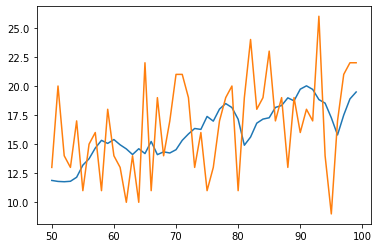

In [96]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [87]:
# val_predictions = model1.predict(X_val1).flatten()
# val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
# val_results

In [88]:
# plt.plot(val_results['Val Predictions'][:100])
# plt.plot(val_results['Actuals'][:100])

In [89]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

12/12 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,15.772609,14
1,16.316866,17
2,17.165743,7
3,15.714606,16
4,16.601517,29
...,...,...
350,13.818678,14
351,13.527078,19
352,14.145182,15
353,14.805773,27


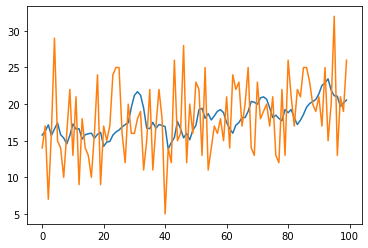

In [90]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [91]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [93]:
MAPE(test_results['Actuals'], test_results['Test Predictions'])

23.473461834874758